In [270]:
from torch.fx import symbolic_trace
import os
os.environ["KMP_DUPLICATE_LIB_OK"]  =  "TRUE"
os.environ["CUDA_VISIBLE_DEVICES"] = "0"
from dnn_models.inceptionv4 import *
from torchvision.models.feature_extraction import get_graph_node_names
from matplotlib import pyplot as plt
import networkx as nx
import pandas as pd
import re

In [438]:
a = [{'name': 'features_0_conv', 'operator': 'conv', 'users': 1, 'args': ['input_1'], 'calculate': 'getattr(self.features, "0").conv(input_1)'}, {'name': 'features_0_bn', 'operator': 'bn', 'users': 1, 'args': ['features_0_conv'], 'calculate': 'getattr(self.features, "0").bn(features_0_conv)'}, {'name': 'features_0_relu', 'operator': 'relu', 'users': 1, 'args': ['features_0_bn'], 'calculate': 'getattr(self.features, "0").relu(features_0_bn)'}, {'name': 'features_1_conv', 'operator': 'conv', 'users': 1, 'args': ['features_0_relu'], 'calculate': 'getattr(self.features, "1").conv(features_0_relu)'}, {'name': 'features_1_bn', 'operator': 'bn', 'users': 1, 'args': ['features_1_conv'], 'calculate': 'getattr(self.features, "1").bn(features_1_conv)'}, {'name': 'features_1_relu', 'operator': 'relu', 'users': 1, 'args': ['features_1_bn'], 'calculate': 'getattr(self.features, "1").relu(features_1_bn)'}, {'name': 'features_2_conv', 'operator': 'conv', 'users': 1, 'args': ['features_1_relu'], 'calculate': 'getattr(self.features, "2").conv(features_1_relu)'}, {'name': 'features_2_bn', 'operator': 'bn', 'users': 1, 'args': ['features_2_conv'], 'calculate': 'getattr(self.features, "2").bn(features_2_conv)'}, {'name': 'features_2_relu', 'operator': 'relu', 'users': 2, 'args': ['features_2_bn'], 'calculate': 'getattr(self.features, "2").relu(features_2_bn)'}, {'name': 'features_3_maxpool', 'operator': 'maxpool', 'users': 1, 'args': ['features_2_relu'], 'calculate': 'getattr(self.features, "3").maxpool(features_2_relu)'}, {'name': 'features_3_conv_conv', 'operator': 'conv', 'users': 1, 'args': ['features_2_relu'], 'calculate': 'getattr(self.features, "3").conv.conv(features_2_relu)'}, {'name': 'features_3_conv_bn', 'operator': 'bn', 'users': 1, 'args': ['features_3_conv_conv'], 'calculate': 'getattr(self.features, "3").conv.bn(features_3_conv_conv)'}, {'name': 'features_3_conv_relu', 'operator': 'relu', 'users': 1, 'args': ['features_3_conv_bn'], 'calculate': 'getattr(self.features, "3").conv.relu(features_3_conv_bn)'}, {'name': 'cat', 'operator': 'cat', 'users': 2, 'args': ['(features_3_maxpool', 'features_3_conv_relu)'], 'calculate': 'torch.cat((features_3_maxpool, features_3_conv_relu), 1)'}, {'name': 'features_4_branch0_0_conv', 'operator': 'conv', 'users': 1, 'args': ['cat'], 'calculate': 'getattr(getattr(self.features, "4").branch0, "0").conv(cat)'}, {'name': 'features_4_branch0_0_bn', 'operator': 'bn', 'users': 1, 'args': ['features_4_branch0_0_conv'], 'calculate': 'getattr(getattr(self.features, "4").branch0, "0").bn(features_4_branch0_0_conv)'}, {'name': 'features_4_branch0_0_relu', 'operator': 'relu', 'users': 1, 'args': ['features_4_branch0_0_bn'], 'calculate': 'getattr(getattr(self.features, "4").branch0, "0").relu(features_4_branch0_0_bn)'}, {'name': 'features_4_branch0_1_conv', 'operator': 'conv', 'users': 1, 'args': ['features_4_branch0_0_relu'], 'calculate': 'getattr(getattr(self.features, "4").branch0, "1").conv(features_4_branch0_0_relu)'}, {'name': 'features_4_branch0_1_bn', 'operator': 'bn', 'users': 1, 'args': ['features_4_branch0_1_conv'], 'calculate': 'getattr(getattr(self.features, "4").branch0, "1").bn(features_4_branch0_1_conv)'}, {'name': 'features_4_branch0_1_relu', 'operator': 'relu', 'users': 1, 'args': ['features_4_branch0_1_bn'], 'calculate': 'getattr(getattr(self.features, "4").branch0, "1").relu(features_4_branch0_1_bn)'}, {'name': 'features_4_branch1_0_conv', 'operator': 'conv', 'users': 1, 'args': ['cat'], 'calculate': 'getattr(getattr(self.features, "4").branch1, "0").conv(cat)'}, {'name': 'features_4_branch1_0_bn', 'operator': 'bn', 'users': 1, 'args': ['features_4_branch1_0_conv'], 'calculate': 'getattr(getattr(self.features, "4").branch1, "0").bn(features_4_branch1_0_conv)'}, {'name': 'features_4_branch1_0_relu', 'operator': 'relu', 'users': 1, 'args': ['features_4_branch1_0_bn'], 'calculate': 'getattr(getattr(self.features, "4").branch1, "0").relu(features_4_branch1_0_bn)'}, {'name': 'features_4_branch1_1_conv', 'operator': 'conv', 'users': 1, 'args': ['features_4_branch1_0_relu'], 'calculate': 'getattr(getattr(self.features, "4").branch1, "1").conv(features_4_branch1_0_relu)'}, {'name': 'features_4_branch1_1_bn', 'operator': 'bn', 'users': 1, 'args': ['features_4_branch1_1_conv'], 'calculate': 'getattr(getattr(self.features, "4").branch1, "1").bn(features_4_branch1_1_conv)'}, {'name': 'features_4_branch1_1_relu', 'operator': 'relu', 'users': 1, 'args': ['features_4_branch1_1_bn'], 'calculate': 'getattr(getattr(self.features, "4").branch1, "1").relu(features_4_branch1_1_bn)'}, {'name': 'features_4_branch1_2_conv', 'operator': 'conv', 'users': 1, 'args': ['features_4_branch1_1_relu'], 'calculate': 'getattr(getattr(self.features, "4").branch1, "2").conv(features_4_branch1_1_relu)'}, {'name': 'features_4_branch1_2_bn', 'operator': 'bn', 'users': 1, 'args': ['features_4_branch1_2_conv'], 'calculate': 'getattr(getattr(self.features, "4").branch1, "2").bn(features_4_branch1_2_conv)'}, {'name': 'features_4_branch1_2_relu', 'operator': 'relu', 'users': 1, 'args': ['features_4_branch1_2_bn'], 'calculate': 'getattr(getattr(self.features, "4").branch1, "2").relu(features_4_branch1_2_bn)'}, {'name': 'features_4_branch1_3_conv', 'operator': 'conv', 'users': 1, 'args': ['features_4_branch1_2_relu'], 'calculate': 'getattr(getattr(self.features, "4").branch1, "3").conv(features_4_branch1_2_relu)'}, {'name': 'features_4_branch1_3_bn', 'operator': 'bn', 'users': 1, 'args': ['features_4_branch1_3_conv'], 'calculate': 'getattr(getattr(self.features, "4").branch1, "3").bn(features_4_branch1_3_conv)'}, {'name': 'features_4_branch1_3_relu', 'operator': 'relu', 'users': 1, 'args': ['features_4_branch1_3_bn'], 'calculate': 'getattr(getattr(self.features, "4").branch1, "3").relu(features_4_branch1_3_bn)'}, {'name': 'cat_1', 'operator': '1', 'users': 2, 'args': ['(features_4_branch0_1_relu', 'features_4_branch1_3_relu)'], 'calculate': 'torch.cat((features_4_branch0_1_relu, features_4_branch1_3_relu), 1)'}, {'name': 'features_5_conv_conv', 'operator': 'conv', 'users': 1, 'args': ['cat_1'], 'calculate': 'getattr(self.features, "5").conv.conv(cat_1)'}, {'name': 'features_5_conv_bn', 'operator': 'bn', 'users': 1, 'args': ['features_5_conv_conv'], 'calculate': 'getattr(self.features, "5").conv.bn(features_5_conv_conv)'}, {'name': 'features_5_conv_relu', 'operator': 'relu', 'users': 1, 'args': ['features_5_conv_bn'], 'calculate': 'getattr(self.features, "5").conv.relu(features_5_conv_bn)'}, {'name': 'features_5_maxpool', 'operator': 'maxpool', 'users': 1, 'args': ['cat_1'], 'calculate': 'getattr(self.features, "5").maxpool(cat_1)'}, {'name': 'cat_2', 'operator': '2', 'users': 4, 'args': ['(features_5_conv_relu', 'features_5_maxpool)'], 'calculate': 'torch.cat((features_5_conv_relu, features_5_maxpool), 1)'}, {'name': 'features_6_branch0_conv', 'operator': 'conv', 'users': 1, 'args': ['cat_2'], 'calculate': 'getattr(self.features, "6").branch0.conv(cat_2)'}, {'name': 'features_6_branch0_bn', 'operator': 'bn', 'users': 1, 'args': ['features_6_branch0_conv'], 'calculate': 'getattr(self.features, "6").branch0.bn(features_6_branch0_conv)'}, {'name': 'features_6_branch0_relu', 'operator': 'relu', 'users': 1, 'args': ['features_6_branch0_bn'], 'calculate': 'getattr(self.features, "6").branch0.relu(features_6_branch0_bn)'}, {'name': 'features_6_branch1_0_conv', 'operator': 'conv', 'users': 1, 'args': ['cat_2'], 'calculate': 'getattr(getattr(self.features, "6").branch1, "0").conv(cat_2)'}, {'name': 'features_6_branch1_0_bn', 'operator': 'bn', 'users': 1, 'args': ['features_6_branch1_0_conv'], 'calculate': 'getattr(getattr(self.features, "6").branch1, "0").bn(features_6_branch1_0_conv)'}, {'name': 'features_6_branch1_0_relu', 'operator': 'relu', 'users': 1, 'args': ['features_6_branch1_0_bn'], 'calculate': 'getattr(getattr(self.features, "6").branch1, "0").relu(features_6_branch1_0_bn)'}, {'name': 'features_6_branch1_1_conv', 'operator': 'conv', 'users': 1, 'args': ['features_6_branch1_0_relu'], 'calculate': 'getattr(getattr(self.features, "6").branch1, "1").conv(features_6_branch1_0_relu)'}, {'name': 'features_6_branch1_1_bn', 'operator': 'bn', 'users': 1, 'args': ['features_6_branch1_1_conv'], 'calculate': 'getattr(getattr(self.features, "6").branch1, "1").bn(features_6_branch1_1_conv)'}, {'name': 'features_6_branch1_1_relu', 'operator': 'relu', 'users': 1, 'args': ['features_6_branch1_1_bn'], 'calculate': 'getattr(getattr(self.features, "6").branch1, "1").relu(features_6_branch1_1_bn)'}, {'name': 'features_6_branch2_0_conv', 'operator': 'conv', 'users': 1, 'args': ['cat_2'], 'calculate': 'getattr(getattr(self.features, "6").branch2, "0").conv(cat_2)'}, {'name': 'features_6_branch2_0_bn', 'operator': 'bn', 'users': 1, 'args': ['features_6_branch2_0_conv'], 'calculate': 'getattr(getattr(self.features, "6").branch2, "0").bn(features_6_branch2_0_conv)'}, {'name': 'features_6_branch2_0_relu', 'operator': 'relu', 'users': 1, 'args': ['features_6_branch2_0_bn'], 'calculate': 'getattr(getattr(self.features, "6").branch2, "0").relu(features_6_branch2_0_bn)'}, {'name': 'features_6_branch2_1_conv', 'operator': 'conv', 'users': 1, 'args': ['features_6_branch2_0_relu'], 'calculate': 'getattr(getattr(self.features, "6").branch2, "1").conv(features_6_branch2_0_relu)'}, {'name': 'features_6_branch2_1_bn', 'operator': 'bn', 'users': 1, 'args': ['features_6_branch2_1_conv'], 'calculate': 'getattr(getattr(self.features, "6").branch2, "1").bn(features_6_branch2_1_conv)'}, {'name': 'features_6_branch2_1_relu', 'operator': 'relu', 'users': 1, 'args': ['features_6_branch2_1_bn'], 'calculate': 'getattr(getattr(self.features, "6").branch2, "1").relu(features_6_branch2_1_bn)'}, {'name': 'features_6_branch2_2_conv', 'operator': 'conv', 'users': 1, 'args': ['features_6_branch2_1_relu'], 'calculate': 'getattr(getattr(self.features, "6").branch2, "2").conv(features_6_branch2_1_relu)'}, {'name': 'features_6_branch2_2_bn', 'operator': 'bn', 'users': 1, 'args': ['features_6_branch2_2_conv'], 'calculate': 'getattr(getattr(self.features, "6").branch2, "2").bn(features_6_branch2_2_conv)'}, {'name': 'features_6_branch2_2_relu', 'operator': 'relu', 'users': 1, 'args': ['features_6_branch2_2_bn'], 'calculate': 'getattr(getattr(self.features, "6").branch2, "2").relu(features_6_branch2_2_bn)'}, {'name': 'features_6_branch3_0', 'operator': '0', 'users': 1, 'args': ['cat_2'], 'calculate': 'getattr(getattr(self.features, "6").branch3, "0")(cat_2)'}, {'name': 'features_6_branch3_1_conv', 'operator': 'conv', 'users': 1, 'args': ['features_6_branch3_0'], 'calculate': 'getattr(getattr(self.features, "6").branch3, "1").conv(features_6_branch3_0)'}, {'name': 'features_6_branch3_1_bn', 'operator': 'bn', 'users': 1, 'args': ['features_6_branch3_1_conv'], 'calculate': 'getattr(getattr(self.features, "6").branch3, "1").bn(features_6_branch3_1_conv)'}, {'name': 'features_6_branch3_1_relu', 'operator': 'relu', 'users': 1, 'args': ['features_6_branch3_1_bn'], 'calculate': 'getattr(getattr(self.features, "6").branch3, "1").relu(features_6_branch3_1_bn)'}, {'name': 'cat_3', 'operator': '3', 'users': 4, 'args': ['(features_6_branch0_relu', 'features_6_branch1_1_relu', 'features_6_branch2_2_relu', 'features_6_branch3_1_relu)'], 'calculate': 'torch.cat((features_6_branch0_relu, features_6_branch1_1_relu, features_6_branch2_2_relu, features_6_branch3_1_relu), 1)'}, {'name': 'features_7_branch0_conv', 'operator': 'conv', 'users': 1, 'args': ['cat_3'], 'calculate': 'getattr(self.features, "7").branch0.conv(cat_3)'}, {'name': 'features_7_branch0_bn', 'operator': 'bn', 'users': 1, 'args': ['features_7_branch0_conv'], 'calculate': 'getattr(self.features, "7").branch0.bn(features_7_branch0_conv)'}, {'name': 'features_7_branch0_relu', 'operator': 'relu', 'users': 1, 'args': ['features_7_branch0_bn'], 'calculate': 'getattr(self.features, "7").branch0.relu(features_7_branch0_bn)'}, {'name': 'features_7_branch1_0_conv', 'operator': 'conv', 'users': 1, 'args': ['cat_3'], 'calculate': 'getattr(getattr(self.features, "7").branch1, "0").conv(cat_3)'}, {'name': 'features_7_branch1_0_bn', 'operator': 'bn', 'users': 1, 'args': ['features_7_branch1_0_conv'], 'calculate': 'getattr(getattr(self.features, "7").branch1, "0").bn(features_7_branch1_0_conv)'}, {'name': 'features_7_branch1_0_relu', 'operator': 'relu', 'users': 1, 'args': ['features_7_branch1_0_bn'], 'calculate': 'getattr(getattr(self.features, "7").branch1, "0").relu(features_7_branch1_0_bn)'}, {'name': 'features_7_branch1_1_conv', 'operator': 'conv', 'users': 1, 'args': ['features_7_branch1_0_relu'], 'calculate': 'getattr(getattr(self.features, "7").branch1, "1").conv(features_7_branch1_0_relu)'}, {'name': 'features_7_branch1_1_bn', 'operator': 'bn', 'users': 1, 'args': ['features_7_branch1_1_conv'], 'calculate': 'getattr(getattr(self.features, "7").branch1, "1").bn(features_7_branch1_1_conv)'}, {'name': 'features_7_branch1_1_relu', 'operator': 'relu', 'users': 1, 'args': ['features_7_branch1_1_bn'], 'calculate': 'getattr(getattr(self.features, "7").branch1, "1").relu(features_7_branch1_1_bn)'}, {'name': 'features_7_branch2_0_conv', 'operator': 'conv', 'users': 1, 'args': ['cat_3'], 'calculate': 'getattr(getattr(self.features, "7").branch2, "0").conv(cat_3)'}, {'name': 'features_7_branch2_0_bn', 'operator': 'bn', 'users': 1, 'args': ['features_7_branch2_0_conv'], 'calculate': 'getattr(getattr(self.features, "7").branch2, "0").bn(features_7_branch2_0_conv)'}, {'name': 'features_7_branch2_0_relu', 'operator': 'relu', 'users': 1, 'args': ['features_7_branch2_0_bn'], 'calculate': 'getattr(getattr(self.features, "7").branch2, "0").relu(features_7_branch2_0_bn)'}, {'name': 'features_7_branch2_1_conv', 'operator': 'conv', 'users': 1, 'args': ['features_7_branch2_0_relu'], 'calculate': 'getattr(getattr(self.features, "7").branch2, "1").conv(features_7_branch2_0_relu)'}, {'name': 'features_7_branch2_1_bn', 'operator': 'bn', 'users': 1, 'args': ['features_7_branch2_1_conv'], 'calculate': 'getattr(getattr(self.features, "7").branch2, "1").bn(features_7_branch2_1_conv)'}, {'name': 'features_7_branch2_1_relu', 'operator': 'relu', 'users': 1, 'args': ['features_7_branch2_1_bn'], 'calculate': 'getattr(getattr(self.features, "7").branch2, "1").relu(features_7_branch2_1_bn)'}, {'name': 'features_7_branch2_2_conv', 'operator': 'conv', 'users': 1, 'args': ['features_7_branch2_1_relu'], 'calculate': 'getattr(getattr(self.features, "7").branch2, "2").conv(features_7_branch2_1_relu)'}, {'name': 'features_7_branch2_2_bn', 'operator': 'bn', 'users': 1, 'args': ['features_7_branch2_2_conv'], 'calculate': 'getattr(getattr(self.features, "7").branch2, "2").bn(features_7_branch2_2_conv)'}, {'name': 'features_7_branch2_2_relu', 'operator': 'relu', 'users': 1, 'args': ['features_7_branch2_2_bn'], 'calculate': 'getattr(getattr(self.features, "7").branch2, "2").relu(features_7_branch2_2_bn)'}, {'name': 'features_7_branch3_0', 'operator': '0', 'users': 1, 'args': ['cat_3'], 'calculate': 'getattr(getattr(self.features, "7").branch3, "0")(cat_3)'}, {'name': 'features_7_branch3_1_conv', 'operator': 'conv', 'users': 1, 'args': ['features_7_branch3_0'], 'calculate': 'getattr(getattr(self.features, "7").branch3, "1").conv(features_7_branch3_0)'}, {'name': 'features_7_branch3_1_bn', 'operator': 'bn', 'users': 1, 'args': ['features_7_branch3_1_conv'], 'calculate': 'getattr(getattr(self.features, "7").branch3, "1").bn(features_7_branch3_1_conv)'}, {'name': 'features_7_branch3_1_relu', 'operator': 'relu', 'users': 1, 'args': ['features_7_branch3_1_bn'], 'calculate': 'getattr(getattr(self.features, "7").branch3, "1").relu(features_7_branch3_1_bn)'}, {'name': 'cat_4', 'operator': '4', 'users': 4, 'args': ['(features_7_branch0_relu', 'features_7_branch1_1_relu', 'features_7_branch2_2_relu', 'features_7_branch3_1_relu)'], 'calculate': 'torch.cat((features_7_branch0_relu, features_7_branch1_1_relu, features_7_branch2_2_relu, features_7_branch3_1_relu), 1)'}, {'name': 'features_8_branch0_conv', 'operator': 'conv', 'users': 1, 'args': ['cat_4'], 'calculate': 'getattr(self.features, "8").branch0.conv(cat_4)'}, {'name': 'features_8_branch0_bn', 'operator': 'bn', 'users': 1, 'args': ['features_8_branch0_conv'], 'calculate': 'getattr(self.features, "8").branch0.bn(features_8_branch0_conv)'}, {'name': 'features_8_branch0_relu', 'operator': 'relu', 'users': 1, 'args': ['features_8_branch0_bn'], 'calculate': 'getattr(self.features, "8").branch0.relu(features_8_branch0_bn)'}, {'name': 'features_8_branch1_0_conv', 'operator': 'conv', 'users': 1, 'args': ['cat_4'], 'calculate': 'getattr(getattr(self.features, "8").branch1, "0").conv(cat_4)'}, {'name': 'features_8_branch1_0_bn', 'operator': 'bn', 'users': 1, 'args': ['features_8_branch1_0_conv'], 'calculate': 'getattr(getattr(self.features, "8").branch1, "0").bn(features_8_branch1_0_conv)'}, {'name': 'features_8_branch1_0_relu', 'operator': 'relu', 'users': 1, 'args': ['features_8_branch1_0_bn'], 'calculate': 'getattr(getattr(self.features, "8").branch1, "0").relu(features_8_branch1_0_bn)'}, {'name': 'features_8_branch1_1_conv', 'operator': 'conv', 'users': 1, 'args': ['features_8_branch1_0_relu'], 'calculate': 'getattr(getattr(self.features, "8").branch1, "1").conv(features_8_branch1_0_relu)'}, {'name': 'features_8_branch1_1_bn', 'operator': 'bn', 'users': 1, 'args': ['features_8_branch1_1_conv'], 'calculate': 'getattr(getattr(self.features, "8").branch1, "1").bn(features_8_branch1_1_conv)'}, {'name': 'features_8_branch1_1_relu', 'operator': 'relu', 'users': 1, 'args': ['features_8_branch1_1_bn'], 'calculate': 'getattr(getattr(self.features, "8").branch1, "1").relu(features_8_branch1_1_bn)'}, {'name': 'features_8_branch2_0_conv', 'operator': 'conv', 'users': 1, 'args': ['cat_4'], 'calculate': 'getattr(getattr(self.features, "8").branch2, "0").conv(cat_4)'}, {'name': 'features_8_branch2_0_bn', 'operator': 'bn', 'users': 1, 'args': ['features_8_branch2_0_conv'], 'calculate': 'getattr(getattr(self.features, "8").branch2, "0").bn(features_8_branch2_0_conv)'}, {'name': 'features_8_branch2_0_relu', 'operator': 'relu', 'users': 1, 'args': ['features_8_branch2_0_bn'], 'calculate': 'getattr(getattr(self.features, "8").branch2, "0").relu(features_8_branch2_0_bn)'}, {'name': 'features_8_branch2_1_conv', 'operator': 'conv', 'users': 1, 'args': ['features_8_branch2_0_relu'], 'calculate': 'getattr(getattr(self.features, "8").branch2, "1").conv(features_8_branch2_0_relu)'}, {'name': 'features_8_branch2_1_bn', 'operator': 'bn', 'users': 1, 'args': ['features_8_branch2_1_conv'], 'calculate': 'getattr(getattr(self.features, "8").branch2, "1").bn(features_8_branch2_1_conv)'}, {'name': 'features_8_branch2_1_relu', 'operator': 'relu', 'users': 1, 'args': ['features_8_branch2_1_bn'], 'calculate': 'getattr(getattr(self.features, "8").branch2, "1").relu(features_8_branch2_1_bn)'}, {'name': 'features_8_branch2_2_conv', 'operator': 'conv', 'users': 1, 'args': ['features_8_branch2_1_relu'], 'calculate': 'getattr(getattr(self.features, "8").branch2, "2").conv(features_8_branch2_1_relu)'}, {'name': 'features_8_branch2_2_bn', 'operator': 'bn', 'users': 1, 'args': ['features_8_branch2_2_conv'], 'calculate': 'getattr(getattr(self.features, "8").branch2, "2").bn(features_8_branch2_2_conv)'}, {'name': 'features_8_branch2_2_relu', 'operator': 'relu', 'users': 1, 'args': ['features_8_branch2_2_bn'], 'calculate': 'getattr(getattr(self.features, "8").branch2, "2").relu(features_8_branch2_2_bn)'}, {'name': 'features_8_branch3_0', 'operator': '0', 'users': 1, 'args': ['cat_4'], 'calculate': 'getattr(getattr(self.features, "8").branch3, "0")(cat_4)'}, {'name': 'features_8_branch3_1_conv', 'operator': 'conv', 'users': 1, 'args': ['features_8_branch3_0'], 'calculate': 'getattr(getattr(self.features, "8").branch3, "1").conv(features_8_branch3_0)'}, {'name': 'features_8_branch3_1_bn', 'operator': 'bn', 'users': 1, 'args': ['features_8_branch3_1_conv'], 'calculate': 'getattr(getattr(self.features, "8").branch3, "1").bn(features_8_branch3_1_conv)'}, {'name': 'features_8_branch3_1_relu', 'operator': 'relu', 'users': 1, 'args': ['features_8_branch3_1_bn'], 'calculate': 'getattr(getattr(self.features, "8").branch3, "1").relu(features_8_branch3_1_bn)'}, {'name': 'cat_5', 'operator': '5', 'users': 4, 'args': ['(features_8_branch0_relu', 'features_8_branch1_1_relu', 'features_8_branch2_2_relu', 'features_8_branch3_1_relu)'], 'calculate': 'torch.cat((features_8_branch0_relu, features_8_branch1_1_relu, features_8_branch2_2_relu, features_8_branch3_1_relu), 1)'}, {'name': 'features_9_branch0_conv', 'operator': 'conv', 'users': 1, 'args': ['cat_5'], 'calculate': 'getattr(self.features, "9").branch0.conv(cat_5)'}, {'name': 'features_9_branch0_bn', 'operator': 'bn', 'users': 1, 'args': ['features_9_branch0_conv'], 'calculate': 'getattr(self.features, "9").branch0.bn(features_9_branch0_conv)'}, {'name': 'features_9_branch0_relu', 'operator': 'relu', 'users': 1, 'args': ['features_9_branch0_bn'], 'calculate': 'getattr(self.features, "9").branch0.relu(features_9_branch0_bn)'}, {'name': 'features_9_branch1_0_conv', 'operator': 'conv', 'users': 1, 'args': ['cat_5'], 'calculate': 'getattr(getattr(self.features, "9").branch1, "0").conv(cat_5)'}, {'name': 'features_9_branch1_0_bn', 'operator': 'bn', 'users': 1, 'args': ['features_9_branch1_0_conv'], 'calculate': 'getattr(getattr(self.features, "9").branch1, "0").bn(features_9_branch1_0_conv)'}, {'name': 'features_9_branch1_0_relu', 'operator': 'relu', 'users': 1, 'args': ['features_9_branch1_0_bn'], 'calculate': 'getattr(getattr(self.features, "9").branch1, "0").relu(features_9_branch1_0_bn)'}, {'name': 'features_9_branch1_1_conv', 'operator': 'conv', 'users': 1, 'args': ['features_9_branch1_0_relu'], 'calculate': 'getattr(getattr(self.features, "9").branch1, "1").conv(features_9_branch1_0_relu)'}, {'name': 'features_9_branch1_1_bn', 'operator': 'bn', 'users': 1, 'args': ['features_9_branch1_1_conv'], 'calculate': 'getattr(getattr(self.features, "9").branch1, "1").bn(features_9_branch1_1_conv)'}, {'name': 'features_9_branch1_1_relu', 'operator': 'relu', 'users': 1, 'args': ['features_9_branch1_1_bn'], 'calculate': 'getattr(getattr(self.features, "9").branch1, "1").relu(features_9_branch1_1_bn)'}, {'name': 'features_9_branch2_0_conv', 'operator': 'conv', 'users': 1, 'args': ['cat_5'], 'calculate': 'getattr(getattr(self.features, "9").branch2, "0").conv(cat_5)'}, {'name': 'features_9_branch2_0_bn', 'operator': 'bn', 'users': 1, 'args': ['features_9_branch2_0_conv'], 'calculate': 'getattr(getattr(self.features, "9").branch2, "0").bn(features_9_branch2_0_conv)'}, {'name': 'features_9_branch2_0_relu', 'operator': 'relu', 'users': 1, 'args': ['features_9_branch2_0_bn'], 'calculate': 'getattr(getattr(self.features, "9").branch2, "0").relu(features_9_branch2_0_bn)'}, {'name': 'features_9_branch2_1_conv', 'operator': 'conv', 'users': 1, 'args': ['features_9_branch2_0_relu'], 'calculate': 'getattr(getattr(self.features, "9").branch2, "1").conv(features_9_branch2_0_relu)'}, {'name': 'features_9_branch2_1_bn', 'operator': 'bn', 'users': 1, 'args': ['features_9_branch2_1_conv'], 'calculate': 'getattr(getattr(self.features, "9").branch2, "1").bn(features_9_branch2_1_conv)'}, {'name': 'features_9_branch2_1_relu', 'operator': 'relu', 'users': 1, 'args': ['features_9_branch2_1_bn'], 'calculate': 'getattr(getattr(self.features, "9").branch2, "1").relu(features_9_branch2_1_bn)'}, {'name': 'features_9_branch2_2_conv', 'operator': 'conv', 'users': 1, 'args': ['features_9_branch2_1_relu'], 'calculate': 'getattr(getattr(self.features, "9").branch2, "2").conv(features_9_branch2_1_relu)'}, {'name': 'features_9_branch2_2_bn', 'operator': 'bn', 'users': 1, 'args': ['features_9_branch2_2_conv'], 'calculate': 'getattr(getattr(self.features, "9").branch2, "2").bn(features_9_branch2_2_conv)'}, {'name': 'features_9_branch2_2_relu', 'operator': 'relu', 'users': 1, 'args': ['features_9_branch2_2_bn'], 'calculate': 'getattr(getattr(self.features, "9").branch2, "2").relu(features_9_branch2_2_bn)'}, {'name': 'features_9_branch3_0', 'operator': '0', 'users': 1, 'args': ['cat_5'], 'calculate': 'getattr(getattr(self.features, "9").branch3, "0")(cat_5)'}, {'name': 'features_9_branch3_1_conv', 'operator': 'conv', 'users': 1, 'args': ['features_9_branch3_0'], 'calculate': 'getattr(getattr(self.features, "9").branch3, "1").conv(features_9_branch3_0)'}, {'name': 'features_9_branch3_1_bn', 'operator': 'bn', 'users': 1, 'args': ['features_9_branch3_1_conv'], 'calculate': 'getattr(getattr(self.features, "9").branch3, "1").bn(features_9_branch3_1_conv)'}, {'name': 'features_9_branch3_1_relu', 'operator': 'relu', 'users': 1, 'args': ['features_9_branch3_1_bn'], 'calculate': 'getattr(getattr(self.features, "9").branch3, "1").relu(features_9_branch3_1_bn)'}, {'name': 'cat_6', 'operator': '6', 'users': 3, 'args': ['(features_9_branch0_relu', 'features_9_branch1_1_relu', 'features_9_branch2_2_relu', 'features_9_branch3_1_relu)'], 'calculate': 'torch.cat((features_9_branch0_relu, features_9_branch1_1_relu, features_9_branch2_2_relu, features_9_branch3_1_relu), 1)'}, {'name': 'features_10_branch0_conv', 'operator': 'conv', 'users': 1, 'args': ['cat_6'], 'calculate': 'getattr(self.features, "10").branch0.conv(cat_6)'}, {'name': 'features_10_branch0_bn', 'operator': 'bn', 'users': 1, 'args': ['features_10_branch0_conv'], 'calculate': 'getattr(self.features, "10").branch0.bn(features_10_branch0_conv)'}, {'name': 'features_10_branch0_relu', 'operator': 'relu', 'users': 1, 'args': ['features_10_branch0_bn'], 'calculate': 'getattr(self.features, "10").branch0.relu(features_10_branch0_bn)'}, {'name': 'features_10_branch1_0_conv', 'operator': 'conv', 'users': 1, 'args': ['cat_6'], 'calculate': 'getattr(getattr(self.features, "10").branch1, "0").conv(cat_6)'}, {'name': 'features_10_branch1_0_bn', 'operator': 'bn', 'users': 1, 'args': ['features_10_branch1_0_conv'], 'calculate': 'getattr(getattr(self.features, "10").branch1, "0").bn(features_10_branch1_0_conv)'}, {'name': 'features_10_branch1_0_relu', 'operator': 'relu', 'users': 1, 'args': ['features_10_branch1_0_bn'], 'calculate': 'getattr(getattr(self.features, "10").branch1, "0").relu(features_10_branch1_0_bn)'}, {'name': 'features_10_branch1_1_conv', 'operator': 'conv', 'users': 1, 'args': ['features_10_branch1_0_relu'], 'calculate': 'getattr(getattr(self.features, "10").branch1, "1").conv(features_10_branch1_0_relu)'}, {'name': 'features_10_branch1_1_bn', 'operator': 'bn', 'users': 1, 'args': ['features_10_branch1_1_conv'], 'calculate': 'getattr(getattr(self.features, "10").branch1, "1").bn(features_10_branch1_1_conv)'}, {'name': 'features_10_branch1_1_relu', 'operator': 'relu', 'users': 1, 'args': ['features_10_branch1_1_bn'], 'calculate': 'getattr(getattr(self.features, "10").branch1, "1").relu(features_10_branch1_1_bn)'}, {'name': 'features_10_branch1_2_conv', 'operator': 'conv', 'users': 1, 'args': ['features_10_branch1_1_relu'], 'calculate': 'getattr(getattr(self.features, "10").branch1, "2").conv(features_10_branch1_1_relu)'}, {'name': 'features_10_branch1_2_bn', 'operator': 'bn', 'users': 1, 'args': ['features_10_branch1_2_conv'], 'calculate': 'getattr(getattr(self.features, "10").branch1, "2").bn(features_10_branch1_2_conv)'}, {'name': 'features_10_branch1_2_relu', 'operator': 'relu', 'users': 1, 'args': ['features_10_branch1_2_bn'], 'calculate': 'getattr(getattr(self.features, "10").branch1, "2").relu(features_10_branch1_2_bn)'}, {'name': 'features_10_branch2', 'operator': 'branch2', 'users': 1, 'args': ['cat_6'], 'calculate': 'getattr(self.features, "10").branch2(cat_6)'}, {'name': 'cat_7', 'operator': '7', 'users': 4, 'args': ['(features_10_branch0_relu', 'features_10_branch1_2_relu', 'features_10_branch2)'], 'calculate': 'torch.cat((features_10_branch0_relu, features_10_branch1_2_relu, features_10_branch2), 1)'}, {'name': 'features_11_branch0_conv', 'operator': 'conv', 'users': 1, 'args': ['cat_7'], 'calculate': 'getattr(self.features, "11").branch0.conv(cat_7)'}, {'name': 'features_11_branch0_bn', 'operator': 'bn', 'users': 1, 'args': ['features_11_branch0_conv'], 'calculate': 'getattr(self.features, "11").branch0.bn(features_11_branch0_conv)'}, {'name': 'features_11_branch0_relu', 'operator': 'relu', 'users': 1, 'args': ['features_11_branch0_bn'], 'calculate': 'getattr(self.features, "11").branch0.relu(features_11_branch0_bn)'}, {'name': 'features_11_branch1_0_conv', 'operator': 'conv', 'users': 1, 'args': ['cat_7'], 'calculate': 'getattr(getattr(self.features, "11").branch1, "0").conv(cat_7)'}, {'name': 'features_11_branch1_0_bn', 'operator': 'bn', 'users': 1, 'args': ['features_11_branch1_0_conv'], 'calculate': 'getattr(getattr(self.features, "11").branch1, "0").bn(features_11_branch1_0_conv)'}, {'name': 'features_11_branch1_0_relu', 'operator': 'relu', 'users': 1, 'args': ['features_11_branch1_0_bn'], 'calculate': 'getattr(getattr(self.features, "11").branch1, "0").relu(features_11_branch1_0_bn)'}, {'name': 'features_11_branch1_1_conv', 'operator': 'conv', 'users': 1, 'args': ['features_11_branch1_0_relu'], 'calculate': 'getattr(getattr(self.features, "11").branch1, "1").conv(features_11_branch1_0_relu)'}, {'name': 'features_11_branch1_1_bn', 'operator': 'bn', 'users': 1, 'args': ['features_11_branch1_1_conv'], 'calculate': 'getattr(getattr(self.features, "11").branch1, "1").bn(features_11_branch1_1_conv)'}, {'name': 'features_11_branch1_1_relu', 'operator': 'relu', 'users': 1, 'args': ['features_11_branch1_1_bn'], 'calculate': 'getattr(getattr(self.features, "11").branch1, "1").relu(features_11_branch1_1_bn)'}, {'name': 'features_11_branch1_2_conv', 'operator': 'conv', 'users': 1, 'args': ['features_11_branch1_1_relu'], 'calculate': 'getattr(getattr(self.features, "11").branch1, "2").conv(features_11_branch1_1_relu)'}, {'name': 'features_11_branch1_2_bn', 'operator': 'bn', 'users': 1, 'args': ['features_11_branch1_2_conv'], 'calculate': 'getattr(getattr(self.features, "11").branch1, "2").bn(features_11_branch1_2_conv)'}, {'name': 'features_11_branch1_2_relu', 'operator': 'relu', 'users': 1, 'args': ['features_11_branch1_2_bn'], 'calculate': 'getattr(getattr(self.features, "11").branch1, "2").relu(features_11_branch1_2_bn)'}, {'name': 'features_11_branch2_0_conv', 'operator': 'conv', 'users': 1, 'args': ['cat_7'], 'calculate': 'getattr(getattr(self.features, "11").branch2, "0").conv(cat_7)'}, {'name': 'features_11_branch2_0_bn', 'operator': 'bn', 'users': 1, 'args': ['features_11_branch2_0_conv'], 'calculate': 'getattr(getattr(self.features, "11").branch2, "0").bn(features_11_branch2_0_conv)'}, {'name': 'features_11_branch2_0_relu', 'operator': 'relu', 'users': 1, 'args': ['features_11_branch2_0_bn'], 'calculate': 'getattr(getattr(self.features, "11").branch2, "0").relu(features_11_branch2_0_bn)'}, {'name': 'features_11_branch2_1_conv', 'operator': 'conv', 'users': 1, 'args': ['features_11_branch2_0_relu'], 'calculate': 'getattr(getattr(self.features, "11").branch2, "1").conv(features_11_branch2_0_relu)'}, {'name': 'features_11_branch2_1_bn', 'operator': 'bn', 'users': 1, 'args': ['features_11_branch2_1_conv'], 'calculate': 'getattr(getattr(self.features, "11").branch2, "1").bn(features_11_branch2_1_conv)'}, {'name': 'features_11_branch2_1_relu', 'operator': 'relu', 'users': 1, 'args': ['features_11_branch2_1_bn'], 'calculate': 'getattr(getattr(self.features, "11").branch2, "1").relu(features_11_branch2_1_bn)'}, {'name': 'features_11_branch2_2_conv', 'operator': 'conv', 'users': 1, 'args': ['features_11_branch2_1_relu'], 'calculate': 'getattr(getattr(self.features, "11").branch2, "2").conv(features_11_branch2_1_relu)'}, {'name': 'features_11_branch2_2_bn', 'operator': 'bn', 'users': 1, 'args': ['features_11_branch2_2_conv'], 'calculate': 'getattr(getattr(self.features, "11").branch2, "2").bn(features_11_branch2_2_conv)'}, {'name': 'features_11_branch2_2_relu', 'operator': 'relu', 'users': 1, 'args': ['features_11_branch2_2_bn'], 'calculate': 'getattr(getattr(self.features, "11").branch2, "2").relu(features_11_branch2_2_bn)'}, {'name': 'features_11_branch2_3_conv', 'operator': 'conv', 'users': 1, 'args': ['features_11_branch2_2_relu'], 'calculate': 'getattr(getattr(self.features, "11").branch2, "3").conv(features_11_branch2_2_relu)'}, {'name': 'features_11_branch2_3_bn', 'operator': 'bn', 'users': 1, 'args': ['features_11_branch2_3_conv'], 'calculate': 'getattr(getattr(self.features, "11").branch2, "3").bn(features_11_branch2_3_conv)'}, {'name': 'features_11_branch2_3_relu', 'operator': 'relu', 'users': 1, 'args': ['features_11_branch2_3_bn'], 'calculate': 'getattr(getattr(self.features, "11").branch2, "3").relu(features_11_branch2_3_bn)'}, {'name': 'features_11_branch2_4_conv', 'operator': 'conv', 'users': 1, 'args': ['features_11_branch2_3_relu'], 'calculate': 'getattr(getattr(self.features, "11").branch2, "4").conv(features_11_branch2_3_relu)'}, {'name': 'features_11_branch2_4_bn', 'operator': 'bn', 'users': 1, 'args': ['features_11_branch2_4_conv'], 'calculate': 'getattr(getattr(self.features, "11").branch2, "4").bn(features_11_branch2_4_conv)'}, {'name': 'features_11_branch2_4_relu', 'operator': 'relu', 'users': 1, 'args': ['features_11_branch2_4_bn'], 'calculate': 'getattr(getattr(self.features, "11").branch2, "4").relu(features_11_branch2_4_bn)'}, {'name': 'features_11_branch3_0', 'operator': '0', 'users': 1, 'args': ['cat_7'], 'calculate': 'getattr(getattr(self.features, "11").branch3, "0")(cat_7)'}, {'name': 'features_11_branch3_1_conv', 'operator': 'conv', 'users': 1, 'args': ['features_11_branch3_0'], 'calculate': 'getattr(getattr(self.features, "11").branch3, "1").conv(features_11_branch3_0)'}, {'name': 'features_11_branch3_1_bn', 'operator': 'bn', 'users': 1, 'args': ['features_11_branch3_1_conv'], 'calculate': 'getattr(getattr(self.features, "11").branch3, "1").bn(features_11_branch3_1_conv)'}, {'name': 'features_11_branch3_1_relu', 'operator': 'relu', 'users': 1, 'args': ['features_11_branch3_1_bn'], 'calculate': 'getattr(getattr(self.features, "11").branch3, "1").relu(features_11_branch3_1_bn)'}, {'name': 'cat_8', 'operator': '8', 'users': 4, 'args': ['(features_11_branch0_relu', 'features_11_branch1_2_relu', 'features_11_branch2_4_relu', 'features_11_branch3_1_relu)'], 'calculate': 'torch.cat((features_11_branch0_relu, features_11_branch1_2_relu, features_11_branch2_4_relu, features_11_branch3_1_relu), 1)'}, {'name': 'features_12_branch0_conv', 'operator': 'conv', 'users': 1, 'args': ['cat_8'], 'calculate': 'getattr(self.features, "12").branch0.conv(cat_8)'}, {'name': 'features_12_branch0_bn', 'operator': 'bn', 'users': 1, 'args': ['features_12_branch0_conv'], 'calculate': 'getattr(self.features, "12").branch0.bn(features_12_branch0_conv)'}, {'name': 'features_12_branch0_relu', 'operator': 'relu', 'users': 1, 'args': ['features_12_branch0_bn'], 'calculate': 'getattr(self.features, "12").branch0.relu(features_12_branch0_bn)'}, {'name': 'features_12_branch1_0_conv', 'operator': 'conv', 'users': 1, 'args': ['cat_8'], 'calculate': 'getattr(getattr(self.features, "12").branch1, "0").conv(cat_8)'}, {'name': 'features_12_branch1_0_bn', 'operator': 'bn', 'users': 1, 'args': ['features_12_branch1_0_conv'], 'calculate': 'getattr(getattr(self.features, "12").branch1, "0").bn(features_12_branch1_0_conv)'}, {'name': 'features_12_branch1_0_relu', 'operator': 'relu', 'users': 1, 'args': ['features_12_branch1_0_bn'], 'calculate': 'getattr(getattr(self.features, "12").branch1, "0").relu(features_12_branch1_0_bn)'}, {'name': 'features_12_branch1_1_conv', 'operator': 'conv', 'users': 1, 'args': ['features_12_branch1_0_relu'], 'calculate': 'getattr(getattr(self.features, "12").branch1, "1").conv(features_12_branch1_0_relu)'}, {'name': 'features_12_branch1_1_bn', 'operator': 'bn', 'users': 1, 'args': ['features_12_branch1_1_conv'], 'calculate': 'getattr(getattr(self.features, "12").branch1, "1").bn(features_12_branch1_1_conv)'}, {'name': 'features_12_branch1_1_relu', 'operator': 'relu', 'users': 1, 'args': ['features_12_branch1_1_bn'], 'calculate': 'getattr(getattr(self.features, "12").branch1, "1").relu(features_12_branch1_1_bn)'}, {'name': 'features_12_branch1_2_conv', 'operator': 'conv', 'users': 1, 'args': ['features_12_branch1_1_relu'], 'calculate': 'getattr(getattr(self.features, "12").branch1, "2").conv(features_12_branch1_1_relu)'}, {'name': 'features_12_branch1_2_bn', 'operator': 'bn', 'users': 1, 'args': ['features_12_branch1_2_conv'], 'calculate': 'getattr(getattr(self.features, "12").branch1, "2").bn(features_12_branch1_2_conv)'}, {'name': 'features_12_branch1_2_relu', 'operator': 'relu', 'users': 1, 'args': ['features_12_branch1_2_bn'], 'calculate': 'getattr(getattr(self.features, "12").branch1, "2").relu(features_12_branch1_2_bn)'}, {'name': 'features_12_branch2_0_conv', 'operator': 'conv', 'users': 1, 'args': ['cat_8'], 'calculate': 'getattr(getattr(self.features, "12").branch2, "0").conv(cat_8)'}, {'name': 'features_12_branch2_0_bn', 'operator': 'bn', 'users': 1, 'args': ['features_12_branch2_0_conv'], 'calculate': 'getattr(getattr(self.features, "12").branch2, "0").bn(features_12_branch2_0_conv)'}, {'name': 'features_12_branch2_0_relu', 'operator': 'relu', 'users': 1, 'args': ['features_12_branch2_0_bn'], 'calculate': 'getattr(getattr(self.features, "12").branch2, "0").relu(features_12_branch2_0_bn)'}, {'name': 'features_12_branch2_1_conv', 'operator': 'conv', 'users': 1, 'args': ['features_12_branch2_0_relu'], 'calculate': 'getattr(getattr(self.features, "12").branch2, "1").conv(features_12_branch2_0_relu)'}, {'name': 'features_12_branch2_1_bn', 'operator': 'bn', 'users': 1, 'args': ['features_12_branch2_1_conv'], 'calculate': 'getattr(getattr(self.features, "12").branch2, "1").bn(features_12_branch2_1_conv)'}, {'name': 'features_12_branch2_1_relu', 'operator': 'relu', 'users': 1, 'args': ['features_12_branch2_1_bn'], 'calculate': 'getattr(getattr(self.features, "12").branch2, "1").relu(features_12_branch2_1_bn)'}, {'name': 'features_12_branch2_2_conv', 'operator': 'conv', 'users': 1, 'args': ['features_12_branch2_1_relu'], 'calculate': 'getattr(getattr(self.features, "12").branch2, "2").conv(features_12_branch2_1_relu)'}, {'name': 'features_12_branch2_2_bn', 'operator': 'bn', 'users': 1, 'args': ['features_12_branch2_2_conv'], 'calculate': 'getattr(getattr(self.features, "12").branch2, "2").bn(features_12_branch2_2_conv)'}, {'name': 'features_12_branch2_2_relu', 'operator': 'relu', 'users': 1, 'args': ['features_12_branch2_2_bn'], 'calculate': 'getattr(getattr(self.features, "12").branch2, "2").relu(features_12_branch2_2_bn)'}, {'name': 'features_12_branch2_3_conv', 'operator': 'conv', 'users': 1, 'args': ['features_12_branch2_2_relu'], 'calculate': 'getattr(getattr(self.features, "12").branch2, "3").conv(features_12_branch2_2_relu)'}, {'name': 'features_12_branch2_3_bn', 'operator': 'bn', 'users': 1, 'args': ['features_12_branch2_3_conv'], 'calculate': 'getattr(getattr(self.features, "12").branch2, "3").bn(features_12_branch2_3_conv)'}, {'name': 'features_12_branch2_3_relu', 'operator': 'relu', 'users': 1, 'args': ['features_12_branch2_3_bn'], 'calculate': 'getattr(getattr(self.features, "12").branch2, "3").relu(features_12_branch2_3_bn)'}, {'name': 'features_12_branch2_4_conv', 'operator': 'conv', 'users': 1, 'args': ['features_12_branch2_3_relu'], 'calculate': 'getattr(getattr(self.features, "12").branch2, "4").conv(features_12_branch2_3_relu)'}, {'name': 'features_12_branch2_4_bn', 'operator': 'bn', 'users': 1, 'args': ['features_12_branch2_4_conv'], 'calculate': 'getattr(getattr(self.features, "12").branch2, "4").bn(features_12_branch2_4_conv)'}, {'name': 'features_12_branch2_4_relu', 'operator': 'relu', 'users': 1, 'args': ['features_12_branch2_4_bn'], 'calculate': 'getattr(getattr(self.features, "12").branch2, "4").relu(features_12_branch2_4_bn)'}, {'name': 'features_12_branch3_0', 'operator': '0', 'users': 1, 'args': ['cat_8'], 'calculate': 'getattr(getattr(self.features, "12").branch3, "0")(cat_8)'}, {'name': 'features_12_branch3_1_conv', 'operator': 'conv', 'users': 1, 'args': ['features_12_branch3_0'], 'calculate': 'getattr(getattr(self.features, "12").branch3, "1").conv(features_12_branch3_0)'}, {'name': 'features_12_branch3_1_bn', 'operator': 'bn', 'users': 1, 'args': ['features_12_branch3_1_conv'], 'calculate': 'getattr(getattr(self.features, "12").branch3, "1").bn(features_12_branch3_1_conv)'}, {'name': 'features_12_branch3_1_relu', 'operator': 'relu', 'users': 1, 'args': ['features_12_branch3_1_bn'], 'calculate': 'getattr(getattr(self.features, "12").branch3, "1").relu(features_12_branch3_1_bn)'}, {'name': 'cat_9', 'operator': '9', 'users': 4, 'args': ['(features_12_branch0_relu', 'features_12_branch1_2_relu', 'features_12_branch2_4_relu', 'features_12_branch3_1_relu)'], 'calculate': 'torch.cat((features_12_branch0_relu, features_12_branch1_2_relu, features_12_branch2_4_relu, features_12_branch3_1_relu), 1)'}, {'name': 'features_13_branch0_conv', 'operator': 'conv', 'users': 1, 'args': ['cat_9'], 'calculate': 'getattr(self.features, "13").branch0.conv(cat_9)'}, {'name': 'features_13_branch0_bn', 'operator': 'bn', 'users': 1, 'args': ['features_13_branch0_conv'], 'calculate': 'getattr(self.features, "13").branch0.bn(features_13_branch0_conv)'}, {'name': 'features_13_branch0_relu', 'operator': 'relu', 'users': 1, 'args': ['features_13_branch0_bn'], 'calculate': 'getattr(self.features, "13").branch0.relu(features_13_branch0_bn)'}, {'name': 'features_13_branch1_0_conv', 'operator': 'conv', 'users': 1, 'args': ['cat_9'], 'calculate': 'getattr(getattr(self.features, "13").branch1, "0").conv(cat_9)'}, {'name': 'features_13_branch1_0_bn', 'operator': 'bn', 'users': 1, 'args': ['features_13_branch1_0_conv'], 'calculate': 'getattr(getattr(self.features, "13").branch1, "0").bn(features_13_branch1_0_conv)'}, {'name': 'features_13_branch1_0_relu', 'operator': 'relu', 'users': 1, 'args': ['features_13_branch1_0_bn'], 'calculate': 'getattr(getattr(self.features, "13").branch1, "0").relu(features_13_branch1_0_bn)'}, {'name': 'features_13_branch1_1_conv', 'operator': 'conv', 'users': 1, 'args': ['features_13_branch1_0_relu'], 'calculate': 'getattr(getattr(self.features, "13").branch1, "1").conv(features_13_branch1_0_relu)'}, {'name': 'features_13_branch1_1_bn', 'operator': 'bn', 'users': 1, 'args': ['features_13_branch1_1_conv'], 'calculate': 'getattr(getattr(self.features, "13").branch1, "1").bn(features_13_branch1_1_conv)'}, {'name': 'features_13_branch1_1_relu', 'operator': 'relu', 'users': 1, 'args': ['features_13_branch1_1_bn'], 'calculate': 'getattr(getattr(self.features, "13").branch1, "1").relu(features_13_branch1_1_bn)'}, {'name': 'features_13_branch1_2_conv', 'operator': 'conv', 'users': 1, 'args': ['features_13_branch1_1_relu'], 'calculate': 'getattr(getattr(self.features, "13").branch1, "2").conv(features_13_branch1_1_relu)'}, {'name': 'features_13_branch1_2_bn', 'operator': 'bn', 'users': 1, 'args': ['features_13_branch1_2_conv'], 'calculate': 'getattr(getattr(self.features, "13").branch1, "2").bn(features_13_branch1_2_conv)'}, {'name': 'features_13_branch1_2_relu', 'operator': 'relu', 'users': 1, 'args': ['features_13_branch1_2_bn'], 'calculate': 'getattr(getattr(self.features, "13").branch1, "2").relu(features_13_branch1_2_bn)'}, {'name': 'features_13_branch2_0_conv', 'operator': 'conv', 'users': 1, 'args': ['cat_9'], 'calculate': 'getattr(getattr(self.features, "13").branch2, "0").conv(cat_9)'}, {'name': 'features_13_branch2_0_bn', 'operator': 'bn', 'users': 1, 'args': ['features_13_branch2_0_conv'], 'calculate': 'getattr(getattr(self.features, "13").branch2, "0").bn(features_13_branch2_0_conv)'}, {'name': 'features_13_branch2_0_relu', 'operator': 'relu', 'users': 1, 'args': ['features_13_branch2_0_bn'], 'calculate': 'getattr(getattr(self.features, "13").branch2, "0").relu(features_13_branch2_0_bn)'}, {'name': 'features_13_branch2_1_conv', 'operator': 'conv', 'users': 1, 'args': ['features_13_branch2_0_relu'], 'calculate': 'getattr(getattr(self.features, "13").branch2, "1").conv(features_13_branch2_0_relu)'}, {'name': 'features_13_branch2_1_bn', 'operator': 'bn', 'users': 1, 'args': ['features_13_branch2_1_conv'], 'calculate': 'getattr(getattr(self.features, "13").branch2, "1").bn(features_13_branch2_1_conv)'}, {'name': 'features_13_branch2_1_relu', 'operator': 'relu', 'users': 1, 'args': ['features_13_branch2_1_bn'], 'calculate': 'getattr(getattr(self.features, "13").branch2, "1").relu(features_13_branch2_1_bn)'}, {'name': 'features_13_branch2_2_conv', 'operator': 'conv', 'users': 1, 'args': ['features_13_branch2_1_relu'], 'calculate': 'getattr(getattr(self.features, "13").branch2, "2").conv(features_13_branch2_1_relu)'}, {'name': 'features_13_branch2_2_bn', 'operator': 'bn', 'users': 1, 'args': ['features_13_branch2_2_conv'], 'calculate': 'getattr(getattr(self.features, "13").branch2, "2").bn(features_13_branch2_2_conv)'}, {'name': 'features_13_branch2_2_relu', 'operator': 'relu', 'users': 1, 'args': ['features_13_branch2_2_bn'], 'calculate': 'getattr(getattr(self.features, "13").branch2, "2").relu(features_13_branch2_2_bn)'}, {'name': 'features_13_branch2_3_conv', 'operator': 'conv', 'users': 1, 'args': ['features_13_branch2_2_relu'], 'calculate': 'getattr(getattr(self.features, "13").branch2, "3").conv(features_13_branch2_2_relu)'}, {'name': 'features_13_branch2_3_bn', 'operator': 'bn', 'users': 1, 'args': ['features_13_branch2_3_conv'], 'calculate': 'getattr(getattr(self.features, "13").branch2, "3").bn(features_13_branch2_3_conv)'}, {'name': 'features_13_branch2_3_relu', 'operator': 'relu', 'users': 1, 'args': ['features_13_branch2_3_bn'], 'calculate': 'getattr(getattr(self.features, "13").branch2, "3").relu(features_13_branch2_3_bn)'}, {'name': 'features_13_branch2_4_conv', 'operator': 'conv', 'users': 1, 'args': ['features_13_branch2_3_relu'], 'calculate': 'getattr(getattr(self.features, "13").branch2, "4").conv(features_13_branch2_3_relu)'}, {'name': 'features_13_branch2_4_bn', 'operator': 'bn', 'users': 1, 'args': ['features_13_branch2_4_conv'], 'calculate': 'getattr(getattr(self.features, "13").branch2, "4").bn(features_13_branch2_4_conv)'}, {'name': 'features_13_branch2_4_relu', 'operator': 'relu', 'users': 1, 'args': ['features_13_branch2_4_bn'], 'calculate': 'getattr(getattr(self.features, "13").branch2, "4").relu(features_13_branch2_4_bn)'}, {'name': 'features_13_branch3_0', 'operator': '0', 'users': 1, 'args': ['cat_9'], 'calculate': 'getattr(getattr(self.features, "13").branch3, "0")(cat_9)'}, {'name': 'features_13_branch3_1_conv', 'operator': 'conv', 'users': 1, 'args': ['features_13_branch3_0'], 'calculate': 'getattr(getattr(self.features, "13").branch3, "1").conv(features_13_branch3_0)'}, {'name': 'features_13_branch3_1_bn', 'operator': 'bn', 'users': 1, 'args': ['features_13_branch3_1_conv'], 'calculate': 'getattr(getattr(self.features, "13").branch3, "1").bn(features_13_branch3_1_conv)'}, {'name': 'features_13_branch3_1_relu', 'operator': 'relu', 'users': 1, 'args': ['features_13_branch3_1_bn'], 'calculate': 'getattr(getattr(self.features, "13").branch3, "1").relu(features_13_branch3_1_bn)'}, {'name': 'cat_10', 'operator': '10', 'users': 4, 'args': ['(features_13_branch0_relu', 'features_13_branch1_2_relu', 'features_13_branch2_4_relu', 'features_13_branch3_1_relu)'], 'calculate': 'torch.cat((features_13_branch0_relu, features_13_branch1_2_relu, features_13_branch2_4_relu, features_13_branch3_1_relu), 1)'}, {'name': 'features_14_branch0_conv', 'operator': 'conv', 'users': 1, 'args': ['cat_10'], 'calculate': 'getattr(self.features, "14").branch0.conv(cat_10)'}, {'name': 'features_14_branch0_bn', 'operator': 'bn', 'users': 1, 'args': ['features_14_branch0_conv'], 'calculate': 'getattr(self.features, "14").branch0.bn(features_14_branch0_conv)'}, {'name': 'features_14_branch0_relu', 'operator': 'relu', 'users': 1, 'args': ['features_14_branch0_bn'], 'calculate': 'getattr(self.features, "14").branch0.relu(features_14_branch0_bn)'}, {'name': 'features_14_branch1_0_conv', 'operator': 'conv', 'users': 1, 'args': ['cat_10'], 'calculate': 'getattr(getattr(self.features, "14").branch1, "0").conv(cat_10)'}, {'name': 'features_14_branch1_0_bn', 'operator': 'bn', 'users': 1, 'args': ['features_14_branch1_0_conv'], 'calculate': 'getattr(getattr(self.features, "14").branch1, "0").bn(features_14_branch1_0_conv)'}, {'name': 'features_14_branch1_0_relu', 'operator': 'relu', 'users': 1, 'args': ['features_14_branch1_0_bn'], 'calculate': 'getattr(getattr(self.features, "14").branch1, "0").relu(features_14_branch1_0_bn)'}, {'name': 'features_14_branch1_1_conv', 'operator': 'conv', 'users': 1, 'args': ['features_14_branch1_0_relu'], 'calculate': 'getattr(getattr(self.features, "14").branch1, "1").conv(features_14_branch1_0_relu)'}, {'name': 'features_14_branch1_1_bn', 'operator': 'bn', 'users': 1, 'args': ['features_14_branch1_1_conv'], 'calculate': 'getattr(getattr(self.features, "14").branch1, "1").bn(features_14_branch1_1_conv)'}, {'name': 'features_14_branch1_1_relu', 'operator': 'relu', 'users': 1, 'args': ['features_14_branch1_1_bn'], 'calculate': 'getattr(getattr(self.features, "14").branch1, "1").relu(features_14_branch1_1_bn)'}, {'name': 'features_14_branch1_2_conv', 'operator': 'conv', 'users': 1, 'args': ['features_14_branch1_1_relu'], 'calculate': 'getattr(getattr(self.features, "14").branch1, "2").conv(features_14_branch1_1_relu)'}, {'name': 'features_14_branch1_2_bn', 'operator': 'bn', 'users': 1, 'args': ['features_14_branch1_2_conv'], 'calculate': 'getattr(getattr(self.features, "14").branch1, "2").bn(features_14_branch1_2_conv)'}, {'name': 'features_14_branch1_2_relu', 'operator': 'relu', 'users': 1, 'args': ['features_14_branch1_2_bn'], 'calculate': 'getattr(getattr(self.features, "14").branch1, "2").relu(features_14_branch1_2_bn)'}, {'name': 'features_14_branch2_0_conv', 'operator': 'conv', 'users': 1, 'args': ['cat_10'], 'calculate': 'getattr(getattr(self.features, "14").branch2, "0").conv(cat_10)'}, {'name': 'features_14_branch2_0_bn', 'operator': 'bn', 'users': 1, 'args': ['features_14_branch2_0_conv'], 'calculate': 'getattr(getattr(self.features, "14").branch2, "0").bn(features_14_branch2_0_conv)'}, {'name': 'features_14_branch2_0_relu', 'operator': 'relu', 'users': 1, 'args': ['features_14_branch2_0_bn'], 'calculate': 'getattr(getattr(self.features, "14").branch2, "0").relu(features_14_branch2_0_bn)'}, {'name': 'features_14_branch2_1_conv', 'operator': 'conv', 'users': 1, 'args': ['features_14_branch2_0_relu'], 'calculate': 'getattr(getattr(self.features, "14").branch2, "1").conv(features_14_branch2_0_relu)'}, {'name': 'features_14_branch2_1_bn', 'operator': 'bn', 'users': 1, 'args': ['features_14_branch2_1_conv'], 'calculate': 'getattr(getattr(self.features, "14").branch2, "1").bn(features_14_branch2_1_conv)'}, {'name': 'features_14_branch2_1_relu', 'operator': 'relu', 'users': 1, 'args': ['features_14_branch2_1_bn'], 'calculate': 'getattr(getattr(self.features, "14").branch2, "1").relu(features_14_branch2_1_bn)'}, {'name': 'features_14_branch2_2_conv', 'operator': 'conv', 'users': 1, 'args': ['features_14_branch2_1_relu'], 'calculate': 'getattr(getattr(self.features, "14").branch2, "2").conv(features_14_branch2_1_relu)'}, {'name': 'features_14_branch2_2_bn', 'operator': 'bn', 'users': 1, 'args': ['features_14_branch2_2_conv'], 'calculate': 'getattr(getattr(self.features, "14").branch2, "2").bn(features_14_branch2_2_conv)'}, {'name': 'features_14_branch2_2_relu', 'operator': 'relu', 'users': 1, 'args': ['features_14_branch2_2_bn'], 'calculate': 'getattr(getattr(self.features, "14").branch2, "2").relu(features_14_branch2_2_bn)'}, {'name': 'features_14_branch2_3_conv', 'operator': 'conv', 'users': 1, 'args': ['features_14_branch2_2_relu'], 'calculate': 'getattr(getattr(self.features, "14").branch2, "3").conv(features_14_branch2_2_relu)'}, {'name': 'features_14_branch2_3_bn', 'operator': 'bn', 'users': 1, 'args': ['features_14_branch2_3_conv'], 'calculate': 'getattr(getattr(self.features, "14").branch2, "3").bn(features_14_branch2_3_conv)'}, {'name': 'features_14_branch2_3_relu', 'operator': 'relu', 'users': 1, 'args': ['features_14_branch2_3_bn'], 'calculate': 'getattr(getattr(self.features, "14").branch2, "3").relu(features_14_branch2_3_bn)'}, {'name': 'features_14_branch2_4_conv', 'operator': 'conv', 'users': 1, 'args': ['features_14_branch2_3_relu'], 'calculate': 'getattr(getattr(self.features, "14").branch2, "4").conv(features_14_branch2_3_relu)'}, {'name': 'features_14_branch2_4_bn', 'operator': 'bn', 'users': 1, 'args': ['features_14_branch2_4_conv'], 'calculate': 'getattr(getattr(self.features, "14").branch2, "4").bn(features_14_branch2_4_conv)'}, {'name': 'features_14_branch2_4_relu', 'operator': 'relu', 'users': 1, 'args': ['features_14_branch2_4_bn'], 'calculate': 'getattr(getattr(self.features, "14").branch2, "4").relu(features_14_branch2_4_bn)'}, {'name': 'features_14_branch3_0', 'operator': '0', 'users': 1, 'args': ['cat_10'], 'calculate': 'getattr(getattr(self.features, "14").branch3, "0")(cat_10)'}, {'name': 'features_14_branch3_1_conv', 'operator': 'conv', 'users': 1, 'args': ['features_14_branch3_0'], 'calculate': 'getattr(getattr(self.features, "14").branch3, "1").conv(features_14_branch3_0)'}, {'name': 'features_14_branch3_1_bn', 'operator': 'bn', 'users': 1, 'args': ['features_14_branch3_1_conv'], 'calculate': 'getattr(getattr(self.features, "14").branch3, "1").bn(features_14_branch3_1_conv)'}, {'name': 'features_14_branch3_1_relu', 'operator': 'relu', 'users': 1, 'args': ['features_14_branch3_1_bn'], 'calculate': 'getattr(getattr(self.features, "14").branch3, "1").relu(features_14_branch3_1_bn)'}, {'name': 'cat_11', 'operator': '11', 'users': 4, 'args': ['(features_14_branch0_relu', 'features_14_branch1_2_relu', 'features_14_branch2_4_relu', 'features_14_branch3_1_relu)'], 'calculate': 'torch.cat((features_14_branch0_relu, features_14_branch1_2_relu, features_14_branch2_4_relu, features_14_branch3_1_relu), 1)'}, {'name': 'features_15_branch0_conv', 'operator': 'conv', 'users': 1, 'args': ['cat_11'], 'calculate': 'getattr(self.features, "15").branch0.conv(cat_11)'}, {'name': 'features_15_branch0_bn', 'operator': 'bn', 'users': 1, 'args': ['features_15_branch0_conv'], 'calculate': 'getattr(self.features, "15").branch0.bn(features_15_branch0_conv)'}, {'name': 'features_15_branch0_relu', 'operator': 'relu', 'users': 1, 'args': ['features_15_branch0_bn'], 'calculate': 'getattr(self.features, "15").branch0.relu(features_15_branch0_bn)'}, {'name': 'features_15_branch1_0_conv', 'operator': 'conv', 'users': 1, 'args': ['cat_11'], 'calculate': 'getattr(getattr(self.features, "15").branch1, "0").conv(cat_11)'}, {'name': 'features_15_branch1_0_bn', 'operator': 'bn', 'users': 1, 'args': ['features_15_branch1_0_conv'], 'calculate': 'getattr(getattr(self.features, "15").branch1, "0").bn(features_15_branch1_0_conv)'}, {'name': 'features_15_branch1_0_relu', 'operator': 'relu', 'users': 1, 'args': ['features_15_branch1_0_bn'], 'calculate': 'getattr(getattr(self.features, "15").branch1, "0").relu(features_15_branch1_0_bn)'}, {'name': 'features_15_branch1_1_conv', 'operator': 'conv', 'users': 1, 'args': ['features_15_branch1_0_relu'], 'calculate': 'getattr(getattr(self.features, "15").branch1, "1").conv(features_15_branch1_0_relu)'}, {'name': 'features_15_branch1_1_bn', 'operator': 'bn', 'users': 1, 'args': ['features_15_branch1_1_conv'], 'calculate': 'getattr(getattr(self.features, "15").branch1, "1").bn(features_15_branch1_1_conv)'}, {'name': 'features_15_branch1_1_relu', 'operator': 'relu', 'users': 1, 'args': ['features_15_branch1_1_bn'], 'calculate': 'getattr(getattr(self.features, "15").branch1, "1").relu(features_15_branch1_1_bn)'}, {'name': 'features_15_branch1_2_conv', 'operator': 'conv', 'users': 1, 'args': ['features_15_branch1_1_relu'], 'calculate': 'getattr(getattr(self.features, "15").branch1, "2").conv(features_15_branch1_1_relu)'}, {'name': 'features_15_branch1_2_bn', 'operator': 'bn', 'users': 1, 'args': ['features_15_branch1_2_conv'], 'calculate': 'getattr(getattr(self.features, "15").branch1, "2").bn(features_15_branch1_2_conv)'}, {'name': 'features_15_branch1_2_relu', 'operator': 'relu', 'users': 1, 'args': ['features_15_branch1_2_bn'], 'calculate': 'getattr(getattr(self.features, "15").branch1, "2").relu(features_15_branch1_2_bn)'}, {'name': 'features_15_branch2_0_conv', 'operator': 'conv', 'users': 1, 'args': ['cat_11'], 'calculate': 'getattr(getattr(self.features, "15").branch2, "0").conv(cat_11)'}, {'name': 'features_15_branch2_0_bn', 'operator': 'bn', 'users': 1, 'args': ['features_15_branch2_0_conv'], 'calculate': 'getattr(getattr(self.features, "15").branch2, "0").bn(features_15_branch2_0_conv)'}, {'name': 'features_15_branch2_0_relu', 'operator': 'relu', 'users': 1, 'args': ['features_15_branch2_0_bn'], 'calculate': 'getattr(getattr(self.features, "15").branch2, "0").relu(features_15_branch2_0_bn)'}, {'name': 'features_15_branch2_1_conv', 'operator': 'conv', 'users': 1, 'args': ['features_15_branch2_0_relu'], 'calculate': 'getattr(getattr(self.features, "15").branch2, "1").conv(features_15_branch2_0_relu)'}, {'name': 'features_15_branch2_1_bn', 'operator': 'bn', 'users': 1, 'args': ['features_15_branch2_1_conv'], 'calculate': 'getattr(getattr(self.features, "15").branch2, "1").bn(features_15_branch2_1_conv)'}, {'name': 'features_15_branch2_1_relu', 'operator': 'relu', 'users': 1, 'args': ['features_15_branch2_1_bn'], 'calculate': 'getattr(getattr(self.features, "15").branch2, "1").relu(features_15_branch2_1_bn)'}, {'name': 'features_15_branch2_2_conv', 'operator': 'conv', 'users': 1, 'args': ['features_15_branch2_1_relu'], 'calculate': 'getattr(getattr(self.features, "15").branch2, "2").conv(features_15_branch2_1_relu)'}, {'name': 'features_15_branch2_2_bn', 'operator': 'bn', 'users': 1, 'args': ['features_15_branch2_2_conv'], 'calculate': 'getattr(getattr(self.features, "15").branch2, "2").bn(features_15_branch2_2_conv)'}, {'name': 'features_15_branch2_2_relu', 'operator': 'relu', 'users': 1, 'args': ['features_15_branch2_2_bn'], 'calculate': 'getattr(getattr(self.features, "15").branch2, "2").relu(features_15_branch2_2_bn)'}, {'name': 'features_15_branch2_3_conv', 'operator': 'conv', 'users': 1, 'args': ['features_15_branch2_2_relu'], 'calculate': 'getattr(getattr(self.features, "15").branch2, "3").conv(features_15_branch2_2_relu)'}, {'name': 'features_15_branch2_3_bn', 'operator': 'bn', 'users': 1, 'args': ['features_15_branch2_3_conv'], 'calculate': 'getattr(getattr(self.features, "15").branch2, "3").bn(features_15_branch2_3_conv)'}, {'name': 'features_15_branch2_3_relu', 'operator': 'relu', 'users': 1, 'args': ['features_15_branch2_3_bn'], 'calculate': 'getattr(getattr(self.features, "15").branch2, "3").relu(features_15_branch2_3_bn)'}, {'name': 'features_15_branch2_4_conv', 'operator': 'conv', 'users': 1, 'args': ['features_15_branch2_3_relu'], 'calculate': 'getattr(getattr(self.features, "15").branch2, "4").conv(features_15_branch2_3_relu)'}, {'name': 'features_15_branch2_4_bn', 'operator': 'bn', 'users': 1, 'args': ['features_15_branch2_4_conv'], 'calculate': 'getattr(getattr(self.features, "15").branch2, "4").bn(features_15_branch2_4_conv)'}, {'name': 'features_15_branch2_4_relu', 'operator': 'relu', 'users': 1, 'args': ['features_15_branch2_4_bn'], 'calculate': 'getattr(getattr(self.features, "15").branch2, "4").relu(features_15_branch2_4_bn)'}, {'name': 'features_15_branch3_0', 'operator': '0', 'users': 1, 'args': ['cat_11'], 'calculate': 'getattr(getattr(self.features, "15").branch3, "0")(cat_11)'}, {'name': 'features_15_branch3_1_conv', 'operator': 'conv', 'users': 1, 'args': ['features_15_branch3_0'], 'calculate': 'getattr(getattr(self.features, "15").branch3, "1").conv(features_15_branch3_0)'}, {'name': 'features_15_branch3_1_bn', 'operator': 'bn', 'users': 1, 'args': ['features_15_branch3_1_conv'], 'calculate': 'getattr(getattr(self.features, "15").branch3, "1").bn(features_15_branch3_1_conv)'}, {'name': 'features_15_branch3_1_relu', 'operator': 'relu', 'users': 1, 'args': ['features_15_branch3_1_bn'], 'calculate': 'getattr(getattr(self.features, "15").branch3, "1").relu(features_15_branch3_1_bn)'}, {'name': 'cat_12', 'operator': '12', 'users': 4, 'args': ['(features_15_branch0_relu', 'features_15_branch1_2_relu', 'features_15_branch2_4_relu', 'features_15_branch3_1_relu)'], 'calculate': 'torch.cat((features_15_branch0_relu, features_15_branch1_2_relu, features_15_branch2_4_relu, features_15_branch3_1_relu), 1)'}, {'name': 'features_16_branch0_conv', 'operator': 'conv', 'users': 1, 'args': ['cat_12'], 'calculate': 'getattr(self.features, "16").branch0.conv(cat_12)'}, {'name': 'features_16_branch0_bn', 'operator': 'bn', 'users': 1, 'args': ['features_16_branch0_conv'], 'calculate': 'getattr(self.features, "16").branch0.bn(features_16_branch0_conv)'}, {'name': 'features_16_branch0_relu', 'operator': 'relu', 'users': 1, 'args': ['features_16_branch0_bn'], 'calculate': 'getattr(self.features, "16").branch0.relu(features_16_branch0_bn)'}, {'name': 'features_16_branch1_0_conv', 'operator': 'conv', 'users': 1, 'args': ['cat_12'], 'calculate': 'getattr(getattr(self.features, "16").branch1, "0").conv(cat_12)'}, {'name': 'features_16_branch1_0_bn', 'operator': 'bn', 'users': 1, 'args': ['features_16_branch1_0_conv'], 'calculate': 'getattr(getattr(self.features, "16").branch1, "0").bn(features_16_branch1_0_conv)'}, {'name': 'features_16_branch1_0_relu', 'operator': 'relu', 'users': 1, 'args': ['features_16_branch1_0_bn'], 'calculate': 'getattr(getattr(self.features, "16").branch1, "0").relu(features_16_branch1_0_bn)'}, {'name': 'features_16_branch1_1_conv', 'operator': 'conv', 'users': 1, 'args': ['features_16_branch1_0_relu'], 'calculate': 'getattr(getattr(self.features, "16").branch1, "1").conv(features_16_branch1_0_relu)'}, {'name': 'features_16_branch1_1_bn', 'operator': 'bn', 'users': 1, 'args': ['features_16_branch1_1_conv'], 'calculate': 'getattr(getattr(self.features, "16").branch1, "1").bn(features_16_branch1_1_conv)'}, {'name': 'features_16_branch1_1_relu', 'operator': 'relu', 'users': 1, 'args': ['features_16_branch1_1_bn'], 'calculate': 'getattr(getattr(self.features, "16").branch1, "1").relu(features_16_branch1_1_bn)'}, {'name': 'features_16_branch1_2_conv', 'operator': 'conv', 'users': 1, 'args': ['features_16_branch1_1_relu'], 'calculate': 'getattr(getattr(self.features, "16").branch1, "2").conv(features_16_branch1_1_relu)'}, {'name': 'features_16_branch1_2_bn', 'operator': 'bn', 'users': 1, 'args': ['features_16_branch1_2_conv'], 'calculate': 'getattr(getattr(self.features, "16").branch1, "2").bn(features_16_branch1_2_conv)'}, {'name': 'features_16_branch1_2_relu', 'operator': 'relu', 'users': 1, 'args': ['features_16_branch1_2_bn'], 'calculate': 'getattr(getattr(self.features, "16").branch1, "2").relu(features_16_branch1_2_bn)'}, {'name': 'features_16_branch2_0_conv', 'operator': 'conv', 'users': 1, 'args': ['cat_12'], 'calculate': 'getattr(getattr(self.features, "16").branch2, "0").conv(cat_12)'}, {'name': 'features_16_branch2_0_bn', 'operator': 'bn', 'users': 1, 'args': ['features_16_branch2_0_conv'], 'calculate': 'getattr(getattr(self.features, "16").branch2, "0").bn(features_16_branch2_0_conv)'}, {'name': 'features_16_branch2_0_relu', 'operator': 'relu', 'users': 1, 'args': ['features_16_branch2_0_bn'], 'calculate': 'getattr(getattr(self.features, "16").branch2, "0").relu(features_16_branch2_0_bn)'}, {'name': 'features_16_branch2_1_conv', 'operator': 'conv', 'users': 1, 'args': ['features_16_branch2_0_relu'], 'calculate': 'getattr(getattr(self.features, "16").branch2, "1").conv(features_16_branch2_0_relu)'}, {'name': 'features_16_branch2_1_bn', 'operator': 'bn', 'users': 1, 'args': ['features_16_branch2_1_conv'], 'calculate': 'getattr(getattr(self.features, "16").branch2, "1").bn(features_16_branch2_1_conv)'}, {'name': 'features_16_branch2_1_relu', 'operator': 'relu', 'users': 1, 'args': ['features_16_branch2_1_bn'], 'calculate': 'getattr(getattr(self.features, "16").branch2, "1").relu(features_16_branch2_1_bn)'}, {'name': 'features_16_branch2_2_conv', 'operator': 'conv', 'users': 1, 'args': ['features_16_branch2_1_relu'], 'calculate': 'getattr(getattr(self.features, "16").branch2, "2").conv(features_16_branch2_1_relu)'}, {'name': 'features_16_branch2_2_bn', 'operator': 'bn', 'users': 1, 'args': ['features_16_branch2_2_conv'], 'calculate': 'getattr(getattr(self.features, "16").branch2, "2").bn(features_16_branch2_2_conv)'}, {'name': 'features_16_branch2_2_relu', 'operator': 'relu', 'users': 1, 'args': ['features_16_branch2_2_bn'], 'calculate': 'getattr(getattr(self.features, "16").branch2, "2").relu(features_16_branch2_2_bn)'}, {'name': 'features_16_branch2_3_conv', 'operator': 'conv', 'users': 1, 'args': ['features_16_branch2_2_relu'], 'calculate': 'getattr(getattr(self.features, "16").branch2, "3").conv(features_16_branch2_2_relu)'}, {'name': 'features_16_branch2_3_bn', 'operator': 'bn', 'users': 1, 'args': ['features_16_branch2_3_conv'], 'calculate': 'getattr(getattr(self.features, "16").branch2, "3").bn(features_16_branch2_3_conv)'}, {'name': 'features_16_branch2_3_relu', 'operator': 'relu', 'users': 1, 'args': ['features_16_branch2_3_bn'], 'calculate': 'getattr(getattr(self.features, "16").branch2, "3").relu(features_16_branch2_3_bn)'}, {'name': 'features_16_branch2_4_conv', 'operator': 'conv', 'users': 1, 'args': ['features_16_branch2_3_relu'], 'calculate': 'getattr(getattr(self.features, "16").branch2, "4").conv(features_16_branch2_3_relu)'}, {'name': 'features_16_branch2_4_bn', 'operator': 'bn', 'users': 1, 'args': ['features_16_branch2_4_conv'], 'calculate': 'getattr(getattr(self.features, "16").branch2, "4").bn(features_16_branch2_4_conv)'}, {'name': 'features_16_branch2_4_relu', 'operator': 'relu', 'users': 1, 'args': ['features_16_branch2_4_bn'], 'calculate': 'getattr(getattr(self.features, "16").branch2, "4").relu(features_16_branch2_4_bn)'}, {'name': 'features_16_branch3_0', 'operator': '0', 'users': 1, 'args': ['cat_12'], 'calculate': 'getattr(getattr(self.features, "16").branch3, "0")(cat_12)'}, {'name': 'features_16_branch3_1_conv', 'operator': 'conv', 'users': 1, 'args': ['features_16_branch3_0'], 'calculate': 'getattr(getattr(self.features, "16").branch3, "1").conv(features_16_branch3_0)'}, {'name': 'features_16_branch3_1_bn', 'operator': 'bn', 'users': 1, 'args': ['features_16_branch3_1_conv'], 'calculate': 'getattr(getattr(self.features, "16").branch3, "1").bn(features_16_branch3_1_conv)'}, {'name': 'features_16_branch3_1_relu', 'operator': 'relu', 'users': 1, 'args': ['features_16_branch3_1_bn'], 'calculate': 'getattr(getattr(self.features, "16").branch3, "1").relu(features_16_branch3_1_bn)'}, {'name': 'cat_13', 'operator': '13', 'users': 4, 'args': ['(features_16_branch0_relu', 'features_16_branch1_2_relu', 'features_16_branch2_4_relu', 'features_16_branch3_1_relu)'], 'calculate': 'torch.cat((features_16_branch0_relu, features_16_branch1_2_relu, features_16_branch2_4_relu, features_16_branch3_1_relu), 1)'}, {'name': 'features_17_branch0_conv', 'operator': 'conv', 'users': 1, 'args': ['cat_13'], 'calculate': 'getattr(self.features, "17").branch0.conv(cat_13)'}, {'name': 'features_17_branch0_bn', 'operator': 'bn', 'users': 1, 'args': ['features_17_branch0_conv'], 'calculate': 'getattr(self.features, "17").branch0.bn(features_17_branch0_conv)'}, {'name': 'features_17_branch0_relu', 'operator': 'relu', 'users': 1, 'args': ['features_17_branch0_bn'], 'calculate': 'getattr(self.features, "17").branch0.relu(features_17_branch0_bn)'}, {'name': 'features_17_branch1_0_conv', 'operator': 'conv', 'users': 1, 'args': ['cat_13'], 'calculate': 'getattr(getattr(self.features, "17").branch1, "0").conv(cat_13)'}, {'name': 'features_17_branch1_0_bn', 'operator': 'bn', 'users': 1, 'args': ['features_17_branch1_0_conv'], 'calculate': 'getattr(getattr(self.features, "17").branch1, "0").bn(features_17_branch1_0_conv)'}, {'name': 'features_17_branch1_0_relu', 'operator': 'relu', 'users': 1, 'args': ['features_17_branch1_0_bn'], 'calculate': 'getattr(getattr(self.features, "17").branch1, "0").relu(features_17_branch1_0_bn)'}, {'name': 'features_17_branch1_1_conv', 'operator': 'conv', 'users': 1, 'args': ['features_17_branch1_0_relu'], 'calculate': 'getattr(getattr(self.features, "17").branch1, "1").conv(features_17_branch1_0_relu)'}, {'name': 'features_17_branch1_1_bn', 'operator': 'bn', 'users': 1, 'args': ['features_17_branch1_1_conv'], 'calculate': 'getattr(getattr(self.features, "17").branch1, "1").bn(features_17_branch1_1_conv)'}, {'name': 'features_17_branch1_1_relu', 'operator': 'relu', 'users': 1, 'args': ['features_17_branch1_1_bn'], 'calculate': 'getattr(getattr(self.features, "17").branch1, "1").relu(features_17_branch1_1_bn)'}, {'name': 'features_17_branch1_2_conv', 'operator': 'conv', 'users': 1, 'args': ['features_17_branch1_1_relu'], 'calculate': 'getattr(getattr(self.features, "17").branch1, "2").conv(features_17_branch1_1_relu)'}, {'name': 'features_17_branch1_2_bn', 'operator': 'bn', 'users': 1, 'args': ['features_17_branch1_2_conv'], 'calculate': 'getattr(getattr(self.features, "17").branch1, "2").bn(features_17_branch1_2_conv)'}, {'name': 'features_17_branch1_2_relu', 'operator': 'relu', 'users': 1, 'args': ['features_17_branch1_2_bn'], 'calculate': 'getattr(getattr(self.features, "17").branch1, "2").relu(features_17_branch1_2_bn)'}, {'name': 'features_17_branch2_0_conv', 'operator': 'conv', 'users': 1, 'args': ['cat_13'], 'calculate': 'getattr(getattr(self.features, "17").branch2, "0").conv(cat_13)'}, {'name': 'features_17_branch2_0_bn', 'operator': 'bn', 'users': 1, 'args': ['features_17_branch2_0_conv'], 'calculate': 'getattr(getattr(self.features, "17").branch2, "0").bn(features_17_branch2_0_conv)'}, {'name': 'features_17_branch2_0_relu', 'operator': 'relu', 'users': 1, 'args': ['features_17_branch2_0_bn'], 'calculate': 'getattr(getattr(self.features, "17").branch2, "0").relu(features_17_branch2_0_bn)'}, {'name': 'features_17_branch2_1_conv', 'operator': 'conv', 'users': 1, 'args': ['features_17_branch2_0_relu'], 'calculate': 'getattr(getattr(self.features, "17").branch2, "1").conv(features_17_branch2_0_relu)'}, {'name': 'features_17_branch2_1_bn', 'operator': 'bn', 'users': 1, 'args': ['features_17_branch2_1_conv'], 'calculate': 'getattr(getattr(self.features, "17").branch2, "1").bn(features_17_branch2_1_conv)'}, {'name': 'features_17_branch2_1_relu', 'operator': 'relu', 'users': 1, 'args': ['features_17_branch2_1_bn'], 'calculate': 'getattr(getattr(self.features, "17").branch2, "1").relu(features_17_branch2_1_bn)'}, {'name': 'features_17_branch2_2_conv', 'operator': 'conv', 'users': 1, 'args': ['features_17_branch2_1_relu'], 'calculate': 'getattr(getattr(self.features, "17").branch2, "2").conv(features_17_branch2_1_relu)'}, {'name': 'features_17_branch2_2_bn', 'operator': 'bn', 'users': 1, 'args': ['features_17_branch2_2_conv'], 'calculate': 'getattr(getattr(self.features, "17").branch2, "2").bn(features_17_branch2_2_conv)'}, {'name': 'features_17_branch2_2_relu', 'operator': 'relu', 'users': 1, 'args': ['features_17_branch2_2_bn'], 'calculate': 'getattr(getattr(self.features, "17").branch2, "2").relu(features_17_branch2_2_bn)'}, {'name': 'features_17_branch2_3_conv', 'operator': 'conv', 'users': 1, 'args': ['features_17_branch2_2_relu'], 'calculate': 'getattr(getattr(self.features, "17").branch2, "3").conv(features_17_branch2_2_relu)'}, {'name': 'features_17_branch2_3_bn', 'operator': 'bn', 'users': 1, 'args': ['features_17_branch2_3_conv'], 'calculate': 'getattr(getattr(self.features, "17").branch2, "3").bn(features_17_branch2_3_conv)'}, {'name': 'features_17_branch2_3_relu', 'operator': 'relu', 'users': 1, 'args': ['features_17_branch2_3_bn'], 'calculate': 'getattr(getattr(self.features, "17").branch2, "3").relu(features_17_branch2_3_bn)'}, {'name': 'features_17_branch2_4_conv', 'operator': 'conv', 'users': 1, 'args': ['features_17_branch2_3_relu'], 'calculate': 'getattr(getattr(self.features, "17").branch2, "4").conv(features_17_branch2_3_relu)'}, {'name': 'features_17_branch2_4_bn', 'operator': 'bn', 'users': 1, 'args': ['features_17_branch2_4_conv'], 'calculate': 'getattr(getattr(self.features, "17").branch2, "4").bn(features_17_branch2_4_conv)'}, {'name': 'features_17_branch2_4_relu', 'operator': 'relu', 'users': 1, 'args': ['features_17_branch2_4_bn'], 'calculate': 'getattr(getattr(self.features, "17").branch2, "4").relu(features_17_branch2_4_bn)'}, {'name': 'features_17_branch3_0', 'operator': '0', 'users': 1, 'args': ['cat_13'], 'calculate': 'getattr(getattr(self.features, "17").branch3, "0")(cat_13)'}, {'name': 'features_17_branch3_1_conv', 'operator': 'conv', 'users': 1, 'args': ['features_17_branch3_0'], 'calculate': 'getattr(getattr(self.features, "17").branch3, "1").conv(features_17_branch3_0)'}, {'name': 'features_17_branch3_1_bn', 'operator': 'bn', 'users': 1, 'args': ['features_17_branch3_1_conv'], 'calculate': 'getattr(getattr(self.features, "17").branch3, "1").bn(features_17_branch3_1_conv)'}, {'name': 'features_17_branch3_1_relu', 'operator': 'relu', 'users': 1, 'args': ['features_17_branch3_1_bn'], 'calculate': 'getattr(getattr(self.features, "17").branch3, "1").relu(features_17_branch3_1_bn)'}, {'name': 'cat_14', 'operator': '14', 'users': 3, 'args': ['(features_17_branch0_relu', 'features_17_branch1_2_relu', 'features_17_branch2_4_relu', 'features_17_branch3_1_relu)'], 'calculate': 'torch.cat((features_17_branch0_relu, features_17_branch1_2_relu, features_17_branch2_4_relu, features_17_branch3_1_relu), 1)'}, {'name': 'features_18_branch0_0_conv', 'operator': 'conv', 'users': 1, 'args': ['cat_14'], 'calculate': 'getattr(getattr(self.features, "18").branch0, "0").conv(cat_14)'}, {'name': 'features_18_branch0_0_bn', 'operator': 'bn', 'users': 1, 'args': ['features_18_branch0_0_conv'], 'calculate': 'getattr(getattr(self.features, "18").branch0, "0").bn(features_18_branch0_0_conv)'}, {'name': 'features_18_branch0_0_relu', 'operator': 'relu', 'users': 1, 'args': ['features_18_branch0_0_bn'], 'calculate': 'getattr(getattr(self.features, "18").branch0, "0").relu(features_18_branch0_0_bn)'}, {'name': 'features_18_branch0_1_conv', 'operator': 'conv', 'users': 1, 'args': ['features_18_branch0_0_relu'], 'calculate': 'getattr(getattr(self.features, "18").branch0, "1").conv(features_18_branch0_0_relu)'}, {'name': 'features_18_branch0_1_bn', 'operator': 'bn', 'users': 1, 'args': ['features_18_branch0_1_conv'], 'calculate': 'getattr(getattr(self.features, "18").branch0, "1").bn(features_18_branch0_1_conv)'}, {'name': 'features_18_branch0_1_relu', 'operator': 'relu', 'users': 1, 'args': ['features_18_branch0_1_bn'], 'calculate': 'getattr(getattr(self.features, "18").branch0, "1").relu(features_18_branch0_1_bn)'}, {'name': 'features_18_branch1_0_conv', 'operator': 'conv', 'users': 1, 'args': ['cat_14'], 'calculate': 'getattr(getattr(self.features, "18").branch1, "0").conv(cat_14)'}, {'name': 'features_18_branch1_0_bn', 'operator': 'bn', 'users': 1, 'args': ['features_18_branch1_0_conv'], 'calculate': 'getattr(getattr(self.features, "18").branch1, "0").bn(features_18_branch1_0_conv)'}, {'name': 'features_18_branch1_0_relu', 'operator': 'relu', 'users': 1, 'args': ['features_18_branch1_0_bn'], 'calculate': 'getattr(getattr(self.features, "18").branch1, "0").relu(features_18_branch1_0_bn)'}, {'name': 'features_18_branch1_1_conv', 'operator': 'conv', 'users': 1, 'args': ['features_18_branch1_0_relu'], 'calculate': 'getattr(getattr(self.features, "18").branch1, "1").conv(features_18_branch1_0_relu)'}, {'name': 'features_18_branch1_1_bn', 'operator': 'bn', 'users': 1, 'args': ['features_18_branch1_1_conv'], 'calculate': 'getattr(getattr(self.features, "18").branch1, "1").bn(features_18_branch1_1_conv)'}, {'name': 'features_18_branch1_1_relu', 'operator': 'relu', 'users': 1, 'args': ['features_18_branch1_1_bn'], 'calculate': 'getattr(getattr(self.features, "18").branch1, "1").relu(features_18_branch1_1_bn)'}, {'name': 'features_18_branch1_2_conv', 'operator': 'conv', 'users': 1, 'args': ['features_18_branch1_1_relu'], 'calculate': 'getattr(getattr(self.features, "18").branch1, "2").conv(features_18_branch1_1_relu)'}, {'name': 'features_18_branch1_2_bn', 'operator': 'bn', 'users': 1, 'args': ['features_18_branch1_2_conv'], 'calculate': 'getattr(getattr(self.features, "18").branch1, "2").bn(features_18_branch1_2_conv)'}, {'name': 'features_18_branch1_2_relu', 'operator': 'relu', 'users': 1, 'args': ['features_18_branch1_2_bn'], 'calculate': 'getattr(getattr(self.features, "18").branch1, "2").relu(features_18_branch1_2_bn)'}, {'name': 'features_18_branch1_3_conv', 'operator': 'conv', 'users': 1, 'args': ['features_18_branch1_2_relu'], 'calculate': 'getattr(getattr(self.features, "18").branch1, "3").conv(features_18_branch1_2_relu)'}, {'name': 'features_18_branch1_3_bn', 'operator': 'bn', 'users': 1, 'args': ['features_18_branch1_3_conv'], 'calculate': 'getattr(getattr(self.features, "18").branch1, "3").bn(features_18_branch1_3_conv)'}, {'name': 'features_18_branch1_3_relu', 'operator': 'relu', 'users': 1, 'args': ['features_18_branch1_3_bn'], 'calculate': 'getattr(getattr(self.features, "18").branch1, "3").relu(features_18_branch1_3_bn)'}, {'name': 'features_18_branch2', 'operator': 'branch2', 'users': 1, 'args': ['cat_14'], 'calculate': 'getattr(self.features, "18").branch2(cat_14)'}, {'name': 'cat_15', 'operator': '15', 'users': 4, 'args': ['(features_18_branch0_1_relu', 'features_18_branch1_3_relu', 'features_18_branch2)'], 'calculate': 'torch.cat((features_18_branch0_1_relu, features_18_branch1_3_relu, features_18_branch2), 1)'}, {'name': 'features_19_branch0_conv', 'operator': 'conv', 'users': 1, 'args': ['cat_15'], 'calculate': 'getattr(self.features, "19").branch0.conv(cat_15)'}, {'name': 'features_19_branch0_bn', 'operator': 'bn', 'users': 1, 'args': ['features_19_branch0_conv'], 'calculate': 'getattr(self.features, "19").branch0.bn(features_19_branch0_conv)'}, {'name': 'features_19_branch0_relu', 'operator': 'relu', 'users': 1, 'args': ['features_19_branch0_bn'], 'calculate': 'getattr(self.features, "19").branch0.relu(features_19_branch0_bn)'}, {'name': 'features_19_branch1_0_conv', 'operator': 'conv', 'users': 1, 'args': ['cat_15'], 'calculate': 'getattr(self.features, "19").branch1_0.conv(cat_15)'}, {'name': 'features_19_branch1_0_bn', 'operator': 'bn', 'users': 1, 'args': ['features_19_branch1_0_conv'], 'calculate': 'getattr(self.features, "19").branch1_0.bn(features_19_branch1_0_conv)'}, {'name': 'features_19_branch1_0_relu', 'operator': 'relu', 'users': 2, 'args': ['features_19_branch1_0_bn'], 'calculate': 'getattr(self.features, "19").branch1_0.relu(features_19_branch1_0_bn)'}, {'name': 'features_19_branch1_1a_conv', 'operator': 'conv', 'users': 1, 'args': ['features_19_branch1_0_relu'], 'calculate': 'getattr(self.features, "19").branch1_1a.conv(features_19_branch1_0_relu)'}, {'name': 'features_19_branch1_1a_bn', 'operator': 'bn', 'users': 1, 'args': ['features_19_branch1_1a_conv'], 'calculate': 'getattr(self.features, "19").branch1_1a.bn(features_19_branch1_1a_conv)'}, {'name': 'features_19_branch1_1a_relu', 'operator': 'relu', 'users': 1, 'args': ['features_19_branch1_1a_bn'], 'calculate': 'getattr(self.features, "19").branch1_1a.relu(features_19_branch1_1a_bn)'}, {'name': 'features_19_branch1_1b_conv', 'operator': 'conv', 'users': 1, 'args': ['features_19_branch1_0_relu'], 'calculate': 'getattr(self.features, "19").branch1_1b.conv(features_19_branch1_0_relu)'}, {'name': 'features_19_branch1_1b_bn', 'operator': 'bn', 'users': 1, 'args': ['features_19_branch1_1b_conv'], 'calculate': 'getattr(self.features, "19").branch1_1b.bn(features_19_branch1_1b_conv)'}, {'name': 'features_19_branch1_1b_relu', 'operator': 'relu', 'users': 1, 'args': ['features_19_branch1_1b_bn'], 'calculate': 'getattr(self.features, "19").branch1_1b.relu(features_19_branch1_1b_bn)'}, {'name': 'cat_16', 'operator': '16', 'users': 1, 'args': ['(features_19_branch1_1a_relu', 'features_19_branch1_1b_relu)'], 'calculate': 'torch.cat((features_19_branch1_1a_relu, features_19_branch1_1b_relu), 1)'}, {'name': 'features_19_branch2_0_conv', 'operator': 'conv', 'users': 1, 'args': ['cat_15'], 'calculate': 'getattr(self.features, "19").branch2_0.conv(cat_15)'}, {'name': 'features_19_branch2_0_bn', 'operator': 'bn', 'users': 1, 'args': ['features_19_branch2_0_conv'], 'calculate': 'getattr(self.features, "19").branch2_0.bn(features_19_branch2_0_conv)'}, {'name': 'features_19_branch2_0_relu', 'operator': 'relu', 'users': 1, 'args': ['features_19_branch2_0_bn'], 'calculate': 'getattr(self.features, "19").branch2_0.relu(features_19_branch2_0_bn)'}, {'name': 'features_19_branch2_1_conv', 'operator': 'conv', 'users': 1, 'args': ['features_19_branch2_0_relu'], 'calculate': 'getattr(self.features, "19").branch2_1.conv(features_19_branch2_0_relu)'}, {'name': 'features_19_branch2_1_bn', 'operator': 'bn', 'users': 1, 'args': ['features_19_branch2_1_conv'], 'calculate': 'getattr(self.features, "19").branch2_1.bn(features_19_branch2_1_conv)'}, {'name': 'features_19_branch2_1_relu', 'operator': 'relu', 'users': 1, 'args': ['features_19_branch2_1_bn'], 'calculate': 'getattr(self.features, "19").branch2_1.relu(features_19_branch2_1_bn)'}, {'name': 'features_19_branch2_2_conv', 'operator': 'conv', 'users': 1, 'args': ['features_19_branch2_1_relu'], 'calculate': 'getattr(self.features, "19").branch2_2.conv(features_19_branch2_1_relu)'}, {'name': 'features_19_branch2_2_bn', 'operator': 'bn', 'users': 1, 'args': ['features_19_branch2_2_conv'], 'calculate': 'getattr(self.features, "19").branch2_2.bn(features_19_branch2_2_conv)'}, {'name': 'features_19_branch2_2_relu', 'operator': 'relu', 'users': 2, 'args': ['features_19_branch2_2_bn'], 'calculate': 'getattr(self.features, "19").branch2_2.relu(features_19_branch2_2_bn)'}, {'name': 'features_19_branch2_3a_conv', 'operator': 'conv', 'users': 1, 'args': ['features_19_branch2_2_relu'], 'calculate': 'getattr(self.features, "19").branch2_3a.conv(features_19_branch2_2_relu)'}, {'name': 'features_19_branch2_3a_bn', 'operator': 'bn', 'users': 1, 'args': ['features_19_branch2_3a_conv'], 'calculate': 'getattr(self.features, "19").branch2_3a.bn(features_19_branch2_3a_conv)'}, {'name': 'features_19_branch2_3a_relu', 'operator': 'relu', 'users': 1, 'args': ['features_19_branch2_3a_bn'], 'calculate': 'getattr(self.features, "19").branch2_3a.relu(features_19_branch2_3a_bn)'}, {'name': 'features_19_branch2_3b_conv', 'operator': 'conv', 'users': 1, 'args': ['features_19_branch2_2_relu'], 'calculate': 'getattr(self.features, "19").branch2_3b.conv(features_19_branch2_2_relu)'}, {'name': 'features_19_branch2_3b_bn', 'operator': 'bn', 'users': 1, 'args': ['features_19_branch2_3b_conv'], 'calculate': 'getattr(self.features, "19").branch2_3b.bn(features_19_branch2_3b_conv)'}, {'name': 'features_19_branch2_3b_relu', 'operator': 'relu', 'users': 1, 'args': ['features_19_branch2_3b_bn'], 'calculate': 'getattr(self.features, "19").branch2_3b.relu(features_19_branch2_3b_bn)'}, {'name': 'cat_17', 'operator': '17', 'users': 1, 'args': ['(features_19_branch2_3a_relu', 'features_19_branch2_3b_relu)'], 'calculate': 'torch.cat((features_19_branch2_3a_relu, features_19_branch2_3b_relu), 1)'}, {'name': 'features_19_branch3_0', 'operator': '0', 'users': 1, 'args': ['cat_15'], 'calculate': 'getattr(getattr(self.features, "19").branch3, "0")(cat_15)'}, {'name': 'features_19_branch3_1_conv', 'operator': 'conv', 'users': 1, 'args': ['features_19_branch3_0'], 'calculate': 'getattr(getattr(self.features, "19").branch3, "1").conv(features_19_branch3_0)'}, {'name': 'features_19_branch3_1_bn', 'operator': 'bn', 'users': 1, 'args': ['features_19_branch3_1_conv'], 'calculate': 'getattr(getattr(self.features, "19").branch3, "1").bn(features_19_branch3_1_conv)'}, {'name': 'features_19_branch3_1_relu', 'operator': 'relu', 'users': 1, 'args': ['features_19_branch3_1_bn'], 'calculate': 'getattr(getattr(self.features, "19").branch3, "1").relu(features_19_branch3_1_bn)'}, {'name': 'cat_18', 'operator': '18', 'users': 4, 'args': ['(features_19_branch0_relu', 'cat_16', 'cat_17', 'features_19_branch3_1_relu)'], 'calculate': 'torch.cat((features_19_branch0_relu, cat_16, cat_17, features_19_branch3_1_relu), 1)'}, {'name': 'features_20_branch0_conv', 'operator': 'conv', 'users': 1, 'args': ['cat_18'], 'calculate': 'getattr(self.features, "20").branch0.conv(cat_18)'}, {'name': 'features_20_branch0_bn', 'operator': 'bn', 'users': 1, 'args': ['features_20_branch0_conv'], 'calculate': 'getattr(self.features, "20").branch0.bn(features_20_branch0_conv)'}, {'name': 'features_20_branch0_relu', 'operator': 'relu', 'users': 1, 'args': ['features_20_branch0_bn'], 'calculate': 'getattr(self.features, "20").branch0.relu(features_20_branch0_bn)'}, {'name': 'features_20_branch1_0_conv', 'operator': 'conv', 'users': 1, 'args': ['cat_18'], 'calculate': 'getattr(self.features, "20").branch1_0.conv(cat_18)'}, {'name': 'features_20_branch1_0_bn', 'operator': 'bn', 'users': 1, 'args': ['features_20_branch1_0_conv'], 'calculate': 'getattr(self.features, "20").branch1_0.bn(features_20_branch1_0_conv)'}, {'name': 'features_20_branch1_0_relu', 'operator': 'relu', 'users': 2, 'args': ['features_20_branch1_0_bn'], 'calculate': 'getattr(self.features, "20").branch1_0.relu(features_20_branch1_0_bn)'}, {'name': 'features_20_branch1_1a_conv', 'operator': 'conv', 'users': 1, 'args': ['features_20_branch1_0_relu'], 'calculate': 'getattr(self.features, "20").branch1_1a.conv(features_20_branch1_0_relu)'}, {'name': 'features_20_branch1_1a_bn', 'operator': 'bn', 'users': 1, 'args': ['features_20_branch1_1a_conv'], 'calculate': 'getattr(self.features, "20").branch1_1a.bn(features_20_branch1_1a_conv)'}, {'name': 'features_20_branch1_1a_relu', 'operator': 'relu', 'users': 1, 'args': ['features_20_branch1_1a_bn'], 'calculate': 'getattr(self.features, "20").branch1_1a.relu(features_20_branch1_1a_bn)'}, {'name': 'features_20_branch1_1b_conv', 'operator': 'conv', 'users': 1, 'args': ['features_20_branch1_0_relu'], 'calculate': 'getattr(self.features, "20").branch1_1b.conv(features_20_branch1_0_relu)'}, {'name': 'features_20_branch1_1b_bn', 'operator': 'bn', 'users': 1, 'args': ['features_20_branch1_1b_conv'], 'calculate': 'getattr(self.features, "20").branch1_1b.bn(features_20_branch1_1b_conv)'}, {'name': 'features_20_branch1_1b_relu', 'operator': 'relu', 'users': 1, 'args': ['features_20_branch1_1b_bn'], 'calculate': 'getattr(self.features, "20").branch1_1b.relu(features_20_branch1_1b_bn)'}, {'name': 'cat_19', 'operator': '19', 'users': 1, 'args': ['(features_20_branch1_1a_relu', 'features_20_branch1_1b_relu)'], 'calculate': 'torch.cat((features_20_branch1_1a_relu, features_20_branch1_1b_relu), 1)'}, {'name': 'features_20_branch2_0_conv', 'operator': 'conv', 'users': 1, 'args': ['cat_18'], 'calculate': 'getattr(self.features, "20").branch2_0.conv(cat_18)'}, {'name': 'features_20_branch2_0_bn', 'operator': 'bn', 'users': 1, 'args': ['features_20_branch2_0_conv'], 'calculate': 'getattr(self.features, "20").branch2_0.bn(features_20_branch2_0_conv)'}, {'name': 'features_20_branch2_0_relu', 'operator': 'relu', 'users': 1, 'args': ['features_20_branch2_0_bn'], 'calculate': 'getattr(self.features, "20").branch2_0.relu(features_20_branch2_0_bn)'}, {'name': 'features_20_branch2_1_conv', 'operator': 'conv', 'users': 1, 'args': ['features_20_branch2_0_relu'], 'calculate': 'getattr(self.features, "20").branch2_1.conv(features_20_branch2_0_relu)'}, {'name': 'features_20_branch2_1_bn', 'operator': 'bn', 'users': 1, 'args': ['features_20_branch2_1_conv'], 'calculate': 'getattr(self.features, "20").branch2_1.bn(features_20_branch2_1_conv)'}, {'name': 'features_20_branch2_1_relu', 'operator': 'relu', 'users': 1, 'args': ['features_20_branch2_1_bn'], 'calculate': 'getattr(self.features, "20").branch2_1.relu(features_20_branch2_1_bn)'}, {'name': 'features_20_branch2_2_conv', 'operator': 'conv', 'users': 1, 'args': ['features_20_branch2_1_relu'], 'calculate': 'getattr(self.features, "20").branch2_2.conv(features_20_branch2_1_relu)'}, {'name': 'features_20_branch2_2_bn', 'operator': 'bn', 'users': 1, 'args': ['features_20_branch2_2_conv'], 'calculate': 'getattr(self.features, "20").branch2_2.bn(features_20_branch2_2_conv)'}, {'name': 'features_20_branch2_2_relu', 'operator': 'relu', 'users': 2, 'args': ['features_20_branch2_2_bn'], 'calculate': 'getattr(self.features, "20").branch2_2.relu(features_20_branch2_2_bn)'}, {'name': 'features_20_branch2_3a_conv', 'operator': 'conv', 'users': 1, 'args': ['features_20_branch2_2_relu'], 'calculate': 'getattr(self.features, "20").branch2_3a.conv(features_20_branch2_2_relu)'}, {'name': 'features_20_branch2_3a_bn', 'operator': 'bn', 'users': 1, 'args': ['features_20_branch2_3a_conv'], 'calculate': 'getattr(self.features, "20").branch2_3a.bn(features_20_branch2_3a_conv)'}, {'name': 'features_20_branch2_3a_relu', 'operator': 'relu', 'users': 1, 'args': ['features_20_branch2_3a_bn'], 'calculate': 'getattr(self.features, "20").branch2_3a.relu(features_20_branch2_3a_bn)'}, {'name': 'features_20_branch2_3b_conv', 'operator': 'conv', 'users': 1, 'args': ['features_20_branch2_2_relu'], 'calculate': 'getattr(self.features, "20").branch2_3b.conv(features_20_branch2_2_relu)'}, {'name': 'features_20_branch2_3b_bn', 'operator': 'bn', 'users': 1, 'args': ['features_20_branch2_3b_conv'], 'calculate': 'getattr(self.features, "20").branch2_3b.bn(features_20_branch2_3b_conv)'}, {'name': 'features_20_branch2_3b_relu', 'operator': 'relu', 'users': 1, 'args': ['features_20_branch2_3b_bn'], 'calculate': 'getattr(self.features, "20").branch2_3b.relu(features_20_branch2_3b_bn)'}, {'name': 'cat_20', 'operator': '20', 'users': 1, 'args': ['(features_20_branch2_3a_relu', 'features_20_branch2_3b_relu)'], 'calculate': 'torch.cat((features_20_branch2_3a_relu, features_20_branch2_3b_relu), 1)'}, {'name': 'features_20_branch3_0', 'operator': '0', 'users': 1, 'args': ['cat_18'], 'calculate': 'getattr(getattr(self.features, "20").branch3, "0")(cat_18)'}, {'name': 'features_20_branch3_1_conv', 'operator': 'conv', 'users': 1, 'args': ['features_20_branch3_0'], 'calculate': 'getattr(getattr(self.features, "20").branch3, "1").conv(features_20_branch3_0)'}, {'name': 'features_20_branch3_1_bn', 'operator': 'bn', 'users': 1, 'args': ['features_20_branch3_1_conv'], 'calculate': 'getattr(getattr(self.features, "20").branch3, "1").bn(features_20_branch3_1_conv)'}, {'name': 'features_20_branch3_1_relu', 'operator': 'relu', 'users': 1, 'args': ['features_20_branch3_1_bn'], 'calculate': 'getattr(getattr(self.features, "20").branch3, "1").relu(features_20_branch3_1_bn)'}, {'name': 'cat_21', 'operator': '21', 'users': 4, 'args': ['(features_20_branch0_relu', 'cat_19', 'cat_20', 'features_20_branch3_1_relu)'], 'calculate': 'torch.cat((features_20_branch0_relu, cat_19, cat_20, features_20_branch3_1_relu), 1)'}, {'name': 'features_21_branch0_conv', 'operator': 'conv', 'users': 1, 'args': ['cat_21'], 'calculate': 'getattr(self.features, "21").branch0.conv(cat_21)'}, {'name': 'features_21_branch0_bn', 'operator': 'bn', 'users': 1, 'args': ['features_21_branch0_conv'], 'calculate': 'getattr(self.features, "21").branch0.bn(features_21_branch0_conv)'}, {'name': 'features_21_branch0_relu', 'operator': 'relu', 'users': 1, 'args': ['features_21_branch0_bn'], 'calculate': 'getattr(self.features, "21").branch0.relu(features_21_branch0_bn)'}, {'name': 'features_21_branch1_0_conv', 'operator': 'conv', 'users': 1, 'args': ['cat_21'], 'calculate': 'getattr(self.features, "21").branch1_0.conv(cat_21)'}, {'name': 'features_21_branch1_0_bn', 'operator': 'bn', 'users': 1, 'args': ['features_21_branch1_0_conv'], 'calculate': 'getattr(self.features, "21").branch1_0.bn(features_21_branch1_0_conv)'}, {'name': 'features_21_branch1_0_relu', 'operator': 'relu', 'users': 2, 'args': ['features_21_branch1_0_bn'], 'calculate': 'getattr(self.features, "21").branch1_0.relu(features_21_branch1_0_bn)'}, {'name': 'features_21_branch1_1a_conv', 'operator': 'conv', 'users': 1, 'args': ['features_21_branch1_0_relu'], 'calculate': 'getattr(self.features, "21").branch1_1a.conv(features_21_branch1_0_relu)'}, {'name': 'features_21_branch1_1a_bn', 'operator': 'bn', 'users': 1, 'args': ['features_21_branch1_1a_conv'], 'calculate': 'getattr(self.features, "21").branch1_1a.bn(features_21_branch1_1a_conv)'}, {'name': 'features_21_branch1_1a_relu', 'operator': 'relu', 'users': 1, 'args': ['features_21_branch1_1a_bn'], 'calculate': 'getattr(self.features, "21").branch1_1a.relu(features_21_branch1_1a_bn)'}, {'name': 'features_21_branch1_1b_conv', 'operator': 'conv', 'users': 1, 'args': ['features_21_branch1_0_relu'], 'calculate': 'getattr(self.features, "21").branch1_1b.conv(features_21_branch1_0_relu)'}, {'name': 'features_21_branch1_1b_bn', 'operator': 'bn', 'users': 1, 'args': ['features_21_branch1_1b_conv'], 'calculate': 'getattr(self.features, "21").branch1_1b.bn(features_21_branch1_1b_conv)'}, {'name': 'features_21_branch1_1b_relu', 'operator': 'relu', 'users': 1, 'args': ['features_21_branch1_1b_bn'], 'calculate': 'getattr(self.features, "21").branch1_1b.relu(features_21_branch1_1b_bn)'}, {'name': 'cat_22', 'operator': '22', 'users': 1, 'args': ['(features_21_branch1_1a_relu', 'features_21_branch1_1b_relu)'], 'calculate': 'torch.cat((features_21_branch1_1a_relu, features_21_branch1_1b_relu), 1)'}, {'name': 'features_21_branch2_0_conv', 'operator': 'conv', 'users': 1, 'args': ['cat_21'], 'calculate': 'getattr(self.features, "21").branch2_0.conv(cat_21)'}, {'name': 'features_21_branch2_0_bn', 'operator': 'bn', 'users': 1, 'args': ['features_21_branch2_0_conv'], 'calculate': 'getattr(self.features, "21").branch2_0.bn(features_21_branch2_0_conv)'}, {'name': 'features_21_branch2_0_relu', 'operator': 'relu', 'users': 1, 'args': ['features_21_branch2_0_bn'], 'calculate': 'getattr(self.features, "21").branch2_0.relu(features_21_branch2_0_bn)'}, {'name': 'features_21_branch2_1_conv', 'operator': 'conv', 'users': 1, 'args': ['features_21_branch2_0_relu'], 'calculate': 'getattr(self.features, "21").branch2_1.conv(features_21_branch2_0_relu)'}, {'name': 'features_21_branch2_1_bn', 'operator': 'bn', 'users': 1, 'args': ['features_21_branch2_1_conv'], 'calculate': 'getattr(self.features, "21").branch2_1.bn(features_21_branch2_1_conv)'}, {'name': 'features_21_branch2_1_relu', 'operator': 'relu', 'users': 1, 'args': ['features_21_branch2_1_bn'], 'calculate': 'getattr(self.features, "21").branch2_1.relu(features_21_branch2_1_bn)'}, {'name': 'features_21_branch2_2_conv', 'operator': 'conv', 'users': 1, 'args': ['features_21_branch2_1_relu'], 'calculate': 'getattr(self.features, "21").branch2_2.conv(features_21_branch2_1_relu)'}, {'name': 'features_21_branch2_2_bn', 'operator': 'bn', 'users': 1, 'args': ['features_21_branch2_2_conv'], 'calculate': 'getattr(self.features, "21").branch2_2.bn(features_21_branch2_2_conv)'}, {'name': 'features_21_branch2_2_relu', 'operator': 'relu', 'users': 2, 'args': ['features_21_branch2_2_bn'], 'calculate': 'getattr(self.features, "21").branch2_2.relu(features_21_branch2_2_bn)'}, {'name': 'features_21_branch2_3a_conv', 'operator': 'conv', 'users': 1, 'args': ['features_21_branch2_2_relu'], 'calculate': 'getattr(self.features, "21").branch2_3a.conv(features_21_branch2_2_relu)'}, {'name': 'features_21_branch2_3a_bn', 'operator': 'bn', 'users': 1, 'args': ['features_21_branch2_3a_conv'], 'calculate': 'getattr(self.features, "21").branch2_3a.bn(features_21_branch2_3a_conv)'}, {'name': 'features_21_branch2_3a_relu', 'operator': 'relu', 'users': 1, 'args': ['features_21_branch2_3a_bn'], 'calculate': 'getattr(self.features, "21").branch2_3a.relu(features_21_branch2_3a_bn)'}, {'name': 'features_21_branch2_3b_conv', 'operator': 'conv', 'users': 1, 'args': ['features_21_branch2_2_relu'], 'calculate': 'getattr(self.features, "21").branch2_3b.conv(features_21_branch2_2_relu)'}, {'name': 'features_21_branch2_3b_bn', 'operator': 'bn', 'users': 1, 'args': ['features_21_branch2_3b_conv'], 'calculate': 'getattr(self.features, "21").branch2_3b.bn(features_21_branch2_3b_conv)'}, {'name': 'features_21_branch2_3b_relu', 'operator': 'relu', 'users': 1, 'args': ['features_21_branch2_3b_bn'], 'calculate': 'getattr(self.features, "21").branch2_3b.relu(features_21_branch2_3b_bn)'}, {'name': 'cat_23', 'operator': '23', 'users': 1, 'args': ['(features_21_branch2_3a_relu', 'features_21_branch2_3b_relu)'], 'calculate': 'torch.cat((features_21_branch2_3a_relu, features_21_branch2_3b_relu), 1)'}, {'name': 'features_21_branch3_0', 'operator': '0', 'users': 1, 'args': ['cat_21'], 'calculate': 'getattr(getattr(self.features, "21").branch3, "0")(cat_21)'}, {'name': 'features_21_branch3_1_conv', 'operator': 'conv', 'users': 1, 'args': ['features_21_branch3_0'], 'calculate': 'getattr(getattr(self.features, "21").branch3, "1").conv(features_21_branch3_0)'}, {'name': 'features_21_branch3_1_bn', 'operator': 'bn', 'users': 1, 'args': ['features_21_branch3_1_conv'], 'calculate': 'getattr(getattr(self.features, "21").branch3, "1").bn(features_21_branch3_1_conv)'}, {'name': 'features_21_branch3_1_relu', 'operator': 'relu', 'users': 1, 'args': ['features_21_branch3_1_bn'], 'calculate': 'getattr(getattr(self.features, "21").branch3, "1").relu(features_21_branch3_1_bn)'}, {'name': 'cat_24', 'operator': '24', 'users': 2, 'args': ['(features_21_branch0_relu', 'cat_22', 'cat_23', 'features_21_branch3_1_relu)'], 'calculate': 'torch.cat((features_21_branch0_relu, cat_22, cat_23, features_21_branch3_1_relu), 1)'}, {'name': 'getattr_1', 'operator': '1', 'users': 1, 'args': ['cat_24'], 'calculate': 'cat_24.shape'}, {'name': 'getitem', 'operator': 'getitem', 'users': 0, 'args': ['getattr_1'], 'calculate': 'getattr_1[2]'}, {'name': 'avg_pool2d', 'operator': 'pool2d', 'users': 2, 'args': ['cat_24'], 'calculate': 'torch._C._nn.avg_pool2d(cat_24, kernel_size = 88'}, {'name': 'size', 'operator': 'size', 'users': 1, 'args': ['avg_pool2d'], 'calculate': 'avg_pool2d.size(0)'}, {'name': 'view', 'operator': 'view', 'users': 1, 'args': ['avg_pool2d', 'size' ], 'calculate': 'avg_pool2d.view(size, -1)'}, {'name': 'last_linear', 'operator': 'linear', 'users': 1, 'args': ['view'], 'calculate': 'self.last_linear(view)'}]


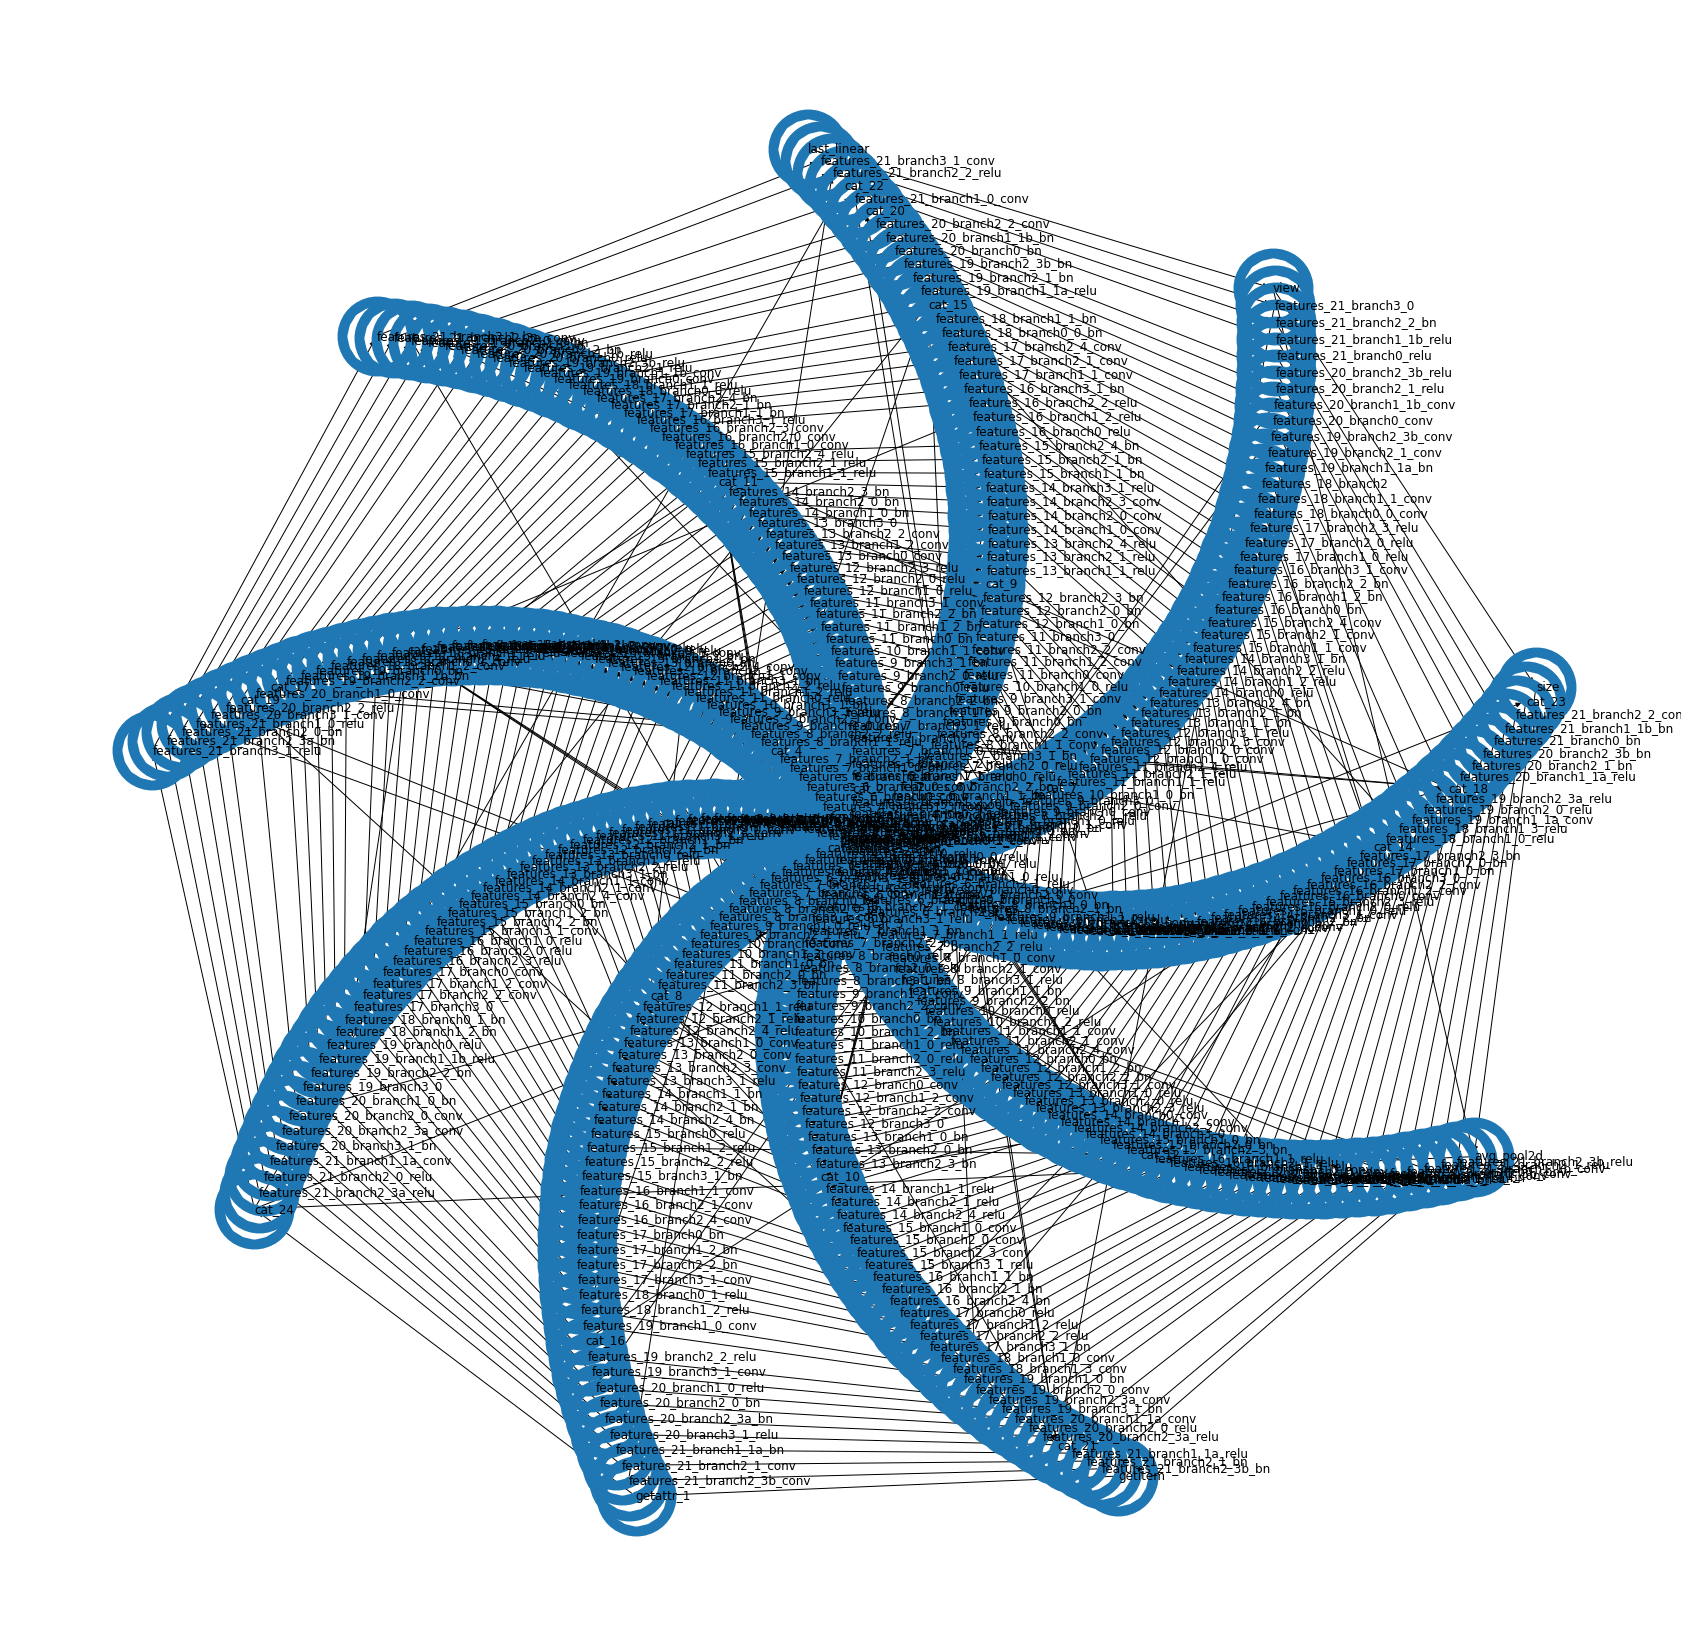

In [439]:
G = nx.DiGraph()
for k in a:
    G.add_node(k['name'])
    G.nodes[k['name']]['operator'] = k['operator']
    G.nodes[k['name']]['calculate'] = k['calculate']
    G.nodes[k['name']]['args'] = k['args']
    if len(k['args']) == 1:

        G.add_edge(str(k['name']), str(k['args'][0]))
    elif len(k['args']) > 1:
        for i in k['args']:
            i = str(i).replace("('", "").replace(")", "")
            if i in G:
                G.add_edge(str(k['name']), str(i))
            
    else:
        G.add_edge(str(k['name']), str(k['name']))
        G.nodes[k['name']]['calculate'] = k['name']

fig, ax = plt.subplots(figsize=(30, 30))
pos = nx.spiral_layout(G, resolution=0.7)

nx.draw(G, pos, with_labels=True, node_size=100, alpha=1, linewidths=70, ax=ax, horizontalalignment='left')


plt.savefig("2.jpg", dpi=1000) #画图


In [440]:
# G.remove_edge('input_1', 'features_0_conv')
# G.remove_node('input_1')
# G.remove_node('shap')
# print(G.nodes)

In [370]:
from __future__ import print_function, division, absolute_import
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.model_zoo as model_zoo
import os
import sys


In [436]:
import re
from torch.autograd import Variable

net = InceptionV4()
branch = []
count = 0

a = ({"input_1": "torch.rand(size=(1,3,299,299))"})

def infer(args, cal, value, count, operator):

    if count == 0:  # first one
        func = cal.rsplit('.', 1)[1]
        x = a.get('input_1')
        res = func.replace('input_1', x)
        res = '.' + res
        s = str()
        for i in value.split('_'):
            if i in ["relu", "conv"]:
                pass
            elif not i.isdigit():
                s += i + '.'
            else:
                s = s.strip('.')
                s += '[' + i + ']'
        res = s + res
        res = 'net.' + res
        r = eval(res)
        r = r.detach()
        

    elif not ('getattr' in cal):

        if 'self' in cal:
            for i in args:
                x = a.get(i)
                t = torch.load(x)
            cal = cal.replace(i, "")
            func = cal.split('self.', 1)[1]
            res = func.split('(', 1)[0]
            res = 'net.' + res
            r = eval(res).eval()(t)
            r = r.detach()
              
        elif any(x in cal for x in ["shape", "size"]):
            for i in args:
                x = a.get(i)
                x = torch.load(x)
                if isinstance(x, int):
                    cal = cal.replace(i, str(x))
                else:
                    t = x
                    cal = cal.replace(i, 't')
            r = eval(cal, {'t':t})


    elif value == 'getitem':
        for i in args:
            x = a.get(i)
            t = torch.load(x)
            func = cal.replace(i,'')
            r = t[int(func[1])]

    else:

            res,t = branchinfer(cal, value, args, operator)

            r = eval(res).eval()(t)
            r = r.detach()
        

    add = "{}.pt".format(value)
  
    torch.save(r, add)

    a.update({value: add})

def branchinfer(func, value, name, operator):
    for i in name:
        x = a.get(i)
        t = torch.load(x)     

    res = handling(func)


    return res, t

pattern = r'getattr\(self.(.+?), "(.+?)"\)\.(.+?)\('


def handling(s):
    res = "net."
    temp = re.findall(pattern, s)
    res += temp[0][0]
    res += f"[{temp[0][1]}]"
    branch = temp[0][2]
    if "." not in branch and "," not in branch:
        res += "." + branch
        return res
    temp = branch.split(".")
    if "," in temp[0]:
        res += f".{temp[0].split(',')[0]}"
        p1 = r'"(.+?)"'
        o = re.findall(p1, f"{temp[0].split(',')[1]}")[0]
        res += f"[{o}]"
    else:
        res += "." + temp[0]
    if len(temp) > 1:
        res += "." + temp[1]
    return res


    
    
def catinfer(name, cal, value, degree):
    if 'torch.cat' in  cal:
        if len(name) == 1:
            x = a.get(str(name[0]))
            t = torch.load(x)
            res = cal.replace(name[0], '')
            res = res.split('(', 1)[0]
            r = eval(res)(t,1)
        else:
            name = str(name).replace("'", "").replace(" ", "")[2:-2].split(",")
            branch = a.get(str(name[0]))
            r = torch.load(branch)
            for i in range(1, len(name)):
                x = a.get(str(name[i]).strip("()"))

                x = torch.load(x)
                r = torch.cat((r, x), 1)
    else:

        x = a.get(str(name[0]))
        t = torch.load(x)
        res = cal.replace(name[0], '')
        res, num = res.split('(', 1)
        num = re.sub(u"([^\u0030-\u0039\u002e\uffe5])", "", num)

        r = eval(res)(t,int(num))

        
    add = "{}.pt".format(value)
    torch.save(r, add)
   
    a.update({value: add})


for key, value in enumerate(G.nodes):
    calculate = G.nodes[value]['calculate']
    args = G.nodes[value]['args']
    operator = G.nodes[value]['operator']
#     users =  G.nodes[value]['users']
    if 'torch' in calculate:
        catinfer(args, calculate, value, G.degree[value])
    else:

            
        infer(args, calculate, value, count, operator)
        
    count += 1

print(torch.load(a.get(list(a.keys())[-1])))


tensor([[ 0.0109, -0.0189,  0.0079,  ...,  0.0200, -0.0148, -0.0009]])
